In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core import datetools
import seaborn as sns
from IPython.display import display, Math, Latex
#from numpy.random import randn
%matplotlib inline

Note: Create Seperate functions to call when executing the analysis with a check to see if you want to plot the graph

Normal Equation for Univariate Linear Regression
===============
(Ordinary Least Squares)
===============

Ordinary least squares regression: minimizes the squared residuals

In [758]:
Math(r'y_{i} = \alpha + \beta*x_{i}+ \epsilon_{i}')

<IPython.core.display.Math object>

Where alpha is the **Intercept**

The **Error** is (**Residuals**):


In [759]:
Math(r'\sum\limits_{i=1}^{n}   (Y_{i}-\hat{Y_{i}}) = \sum\limits_{i=1}^{n}(\hat{\epsilon_{i}})')

<IPython.core.display.Math object>

And **Beta** is the slope and equals the covariance between y and x
divided by the variance of x

In [760]:
Math(r'\hat{\beta}_{xy} = \frac{\sum\limits_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}    {\sum\limits_{i=1}^{n}(x_{i}-\bar{x})^2}')

<IPython.core.display.Math object>

**OR** in Linear Algebra Language

In [761]:
Math(r'\hat{\beta}_{xy} = X^TX^{-1}X^Ty')

<IPython.core.display.Math object>

In [768]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex1/'

col_names = ['pop', 'profit']
raw_data=pd.read_table(location+'ex1data1.txt', delimiter=',',names=col_names)

In [769]:
raw_data.columns

Index(['pop', 'profit'], dtype='object')

In [770]:
#prep=raw_data.drop('compiled from Yahoo! Finance data by Matt Borthwick',axis=1).copy()
prep=raw_data.copy()
prep.insert(0,'intercept',1)
col=prep.shape[1]

features = prep.iloc[:,0:col-1]
target = prep.iloc[:,col-1:col]
n = prep.shape[0]
theta=np.zeros(2)

In [771]:
X = np.matrix(features.values)
y = np.matrix(target.values)
theta=np.matrix(theta)
alpha=.01
num_iters=1500

Regression

In [772]:
from numpy.linalg import inv
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression
import seaborn as sns

def normalEqn(X,y):  
    X=np.matrix(X)
    y=np.matrix(y)
    #Creating theta values for normal equation
    theta=inv(X.T*X)*X.T*y
    
    #using statsmodels so I can get nice table of regression results
    estimate = sm.OLS(y, X)
    estimate = estimate.fit()
    print(estimate.summary(),'\n')
    plotQ=input('Would you like to plot a graph? Please enter: "y" or "n". ')
    if plotQ.lower()=='y':
        #modifying variables for plotting and estimation
        arrX=np.array(X[:,1])[:,0]
        arrY=np.array(y[:,0])[:,0]    

        #Setting up for plotting data on graph using sklearn
        model = LinearRegression(fit_intercept=True)
        model.fit(arrX[:, np.newaxis], arrY)

        xfit = np.linspace(5, 23, 1000)
        yfit = model.predict(xfit[:, np.newaxis])

        plt.scatter(arrX, arrY, marker='x', c='r', s=30, label='data')
        plt.plot(xfit, yfit, label='h(x) = %0.2f + %0.2fx'%(model.intercept_, model.coef_[0]))
        pst = plt.legend(loc='lower right', frameon=True)
        pst.get_frame().set_edgecolor('k');
        print("Model intercept: ", model.intercept_)
        print("Model slope:     ", model.coef_[0])
        plt.show()        
    else:
        print('No plot created.')
    return 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           1.02e-26
Time:                        16:08:31   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.0

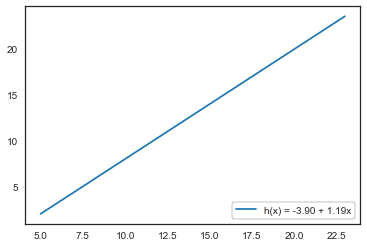

In [773]:
normalEqn(X,y)

In [774]:
plt.close('all')

Gradient Descent for Linear Regression
==========

Hypothesis Function

In [775]:
Math(r'\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x')

<IPython.core.display.Math object>

Compute Cost Function for Linear Regression



In [776]:
Math(r'J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2')

<IPython.core.display.Math object>

Compute Gradient Step

In [777]:
Math(r'\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}')

<IPython.core.display.Math object>

**Linear Algebra Solution**

In [778]:
Math(r'\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em}  \theta_1 \hspace{2em}  ...  \hspace{2em}  \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}')

<IPython.core.display.Math object>

In [779]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex1/'

col_names = ['pop', 'profit']
raw_data=pd.read_table(location+'ex1data1.txt', delimiter=',',names=col_names)

In [780]:
import numpy as np
              
def computeCost(X, y, theta):
    m = y.size
    J = 0
    """
       computes the cost of using theta as the parameter for linear 
       regression to fit the data points in X and y
    """
    #Multiply X and theta, in proper order that the inner dimensions match
    #h=the (hypothesis/prediction) product of X and theta
    h=(X.dot(theta.T))
    #Compute the difference between the predicted y's and observed y's and square the result.
    error_sqr=np.power(((h)-y),2)
    #sum the error terms and scale the result
    J=np.sum(error_sqr)/(2*m)
    return J

In [781]:
computeCost(X, y, theta)

32.072733877455676

In [782]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',c='r')

def gradientDescent(X, y, theta, alpha, num_iters):
    """
     Performs gradient descent to learn theta
       theta = gradientDescent(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    J_history = np.ones((num_iters, 1))
    m = y.size  # number of training examples
    
    for i in range(num_iters):
        h=(X.dot(theta.T))
        error_vec=((h)-y)
        delta = np.dot((np.dot(X,theta.T) - y).T, X).T
        theta -= (alpha/m) * delta.T
        J_history[i, 0] = computeCost(X, y, theta)
    plotQ=input('Would you like to plot a graph? Please enter: "y" or "n". ')
    if plotQ.lower()=='y':
        #Creating Cost Function Plot
        plt.plot(np.linspace(0, num_iters, num_iters), J_history)
        plt.title('Cost function against number of iterations')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost function J(theta)')
        plt.show()

        #Creating Slope and intercept for line plot
        slope=theta[:,1].item()
        intercept=theta[:,0].item()
        #Setting matrix to arrays values
        arrX=np.array(X[:,1])[:,0]
        arrY=np.array(y[:,0])[:,0]
        #Create Scatter Plot with line
        print("Model intercept: ",theta[:,0].item())
        print("Model slope:     ",theta[:,1].item())
        plt.scatter(arrX, arrY)
        abline(slope,intercept)
    else:
        print('No plot created.')
    return  

Would you like to plot a graph? Please enter: "y" or "n". y


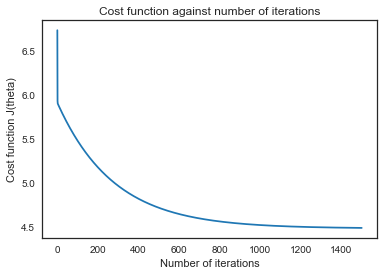

Model intercept:  -3.63029143940436
Model slope:      1.166362350335582


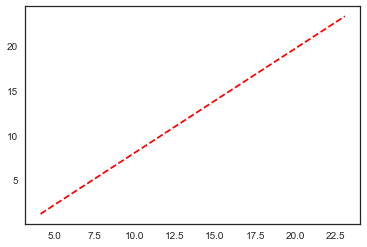

In [783]:
gradientDescent(X, y, theta, alpha, num_iters)

Prediction

In [785]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta.T)
predict2 = np.array([1, 7]).dot(theta.T)
print('For population = 35,000, we predict a profit of {:.4f}'.format(predict1.item(0)*10000))
print('For population = 70,000, we predict a profit of {:.4f}'.format(predict2.item(0)*10000))

For population = 35,000, we predict a profit of 4519.7679
For population = 70,000, we predict a profit of 45342.4501


In [786]:
plt.close('all')

Gradient Descent for Multivariate Linear Regression
==============================

Start with **feature scaling** and **mean normalization** if needed:

In [787]:
Math(r'x_i := \dfrac{x_i - \mu_i}{s_i}')

<IPython.core.display.Math object>

Everything is the same as Univariate Linear Regression the equation looks slightly modified...

In [788]:
Math(r'y_{i} = \beta_{0} + \beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{3}+...+\beta_{n}x_{n}+ \epsilon_{i}')

<IPython.core.display.Math object>

The Hypothesis:

In [789]:
Math(r'h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n')

<IPython.core.display.Math object>

The linear algebra solution:

In [790]:
Math(r'\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em}  \theta_1 \hspace{2em}  ...  \hspace{2em}  \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}')

<IPython.core.display.Math object>

Cost Function
=============

In [791]:
Math(r'J(\theta) = \dfrac {1}{2m} \displaystyle \sum_{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2')

<IPython.core.display.Math object>

Gradient Descent for Multiple Variables
==========================================

In [792]:
Math(r'\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline  \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}')

<IPython.core.display.Math object>

**OR**

In [793]:
Math(r'\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \;  & \text{for j := 0..n}\newline \rbrace\end{align*}')

<IPython.core.display.Math object>

Matrix Vectorized for Gradient Descent

In [794]:
Math(r'\begin{align*} \; &\frac{\partial J(\theta)}{\partial \theta_j} &=&  \frac{1}{m} \sum\limits_{i=1}^{m}  \left(h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} \newline \; & &=& \frac{1}{m} \sum\limits_{i=1}^{m}   x_j^{(i)} \cdot \left(h_\theta(x^{(i)}) - y^{(i)}  \right)  \end{align*}')

<IPython.core.display.Math object>

Simplified

In [795]:
Math(r'\theta := \theta - \frac{\alpha}{m} X^{T} (X\theta - \vec{y})')

<IPython.core.display.Math object>

In [796]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex1/'

col_names = ['sqrft', 'rooms', 'price']
raw_data=pd.read_table(location+'ex1data2.txt', delimiter=',',names=col_names)

In [797]:
raw_data.head()

   sqrft  rooms   price
0   2104      3  399900
1   1600      3  329900
2   2400      3  369000
3   1416      2  232000
4   3000      4  539900

Data Normalization

In [798]:
def featureNormalize(data):
    data=(data-data.mean())/data.std()
    return data

In [799]:
NormData=featureNormalize(raw_data)

In [800]:
#prep raw_data
prep=NormData.copy()
prep.insert(0,'intercept',1)
col=prep.shape[1]

In [801]:
features = prep.iloc[:,0:col-1]
target = prep.iloc[:,col-1:col]
n = prep.shape[0]
theta = np.matrix(np.zeros(3))

In [802]:
X = np.matrix(features.values)
y = np.matrix(target.values)
theta=np.matrix(theta)

In [803]:
num_iters = 1500
alpha = 0.01

Cost Function for Multivariate Regression

In [804]:
import numpy as np
              
def computeCost(X, y, theta):
    m = y.size
    J = 0
    """
       computes the cost of using theta as the parameter for linear 
       regression to fit the data points in X and y
    """
    #Multiply X and theta, in proper order that the inner dimensions match
    #h=the (hypothesis/prediction) product of X and theta
    h=(X.dot(theta.T))
    #Compute the difference between the predicted y's and observed y's and square the result.
    error_sqr=np.power(((h)-y),2)
    #sum the error terms and scale the result
    J=np.sum(error_sqr)/(2*m)
    return J

In [805]:
computeCost(X, y, theta)

0.48936170212765967

In [806]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
def gradientDescent(X, y, theta, alpha, num_iters):
    """
     Performs gradient descent to learn theta
       theta = gradientDescent(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha
    """
    # Initialize some useful values
    J_history = []
    m,n = X.shape  # number of training examples
    for i in range(num_iters):
        h=(X.dot(theta.T))
        error_vec=((h)-y)
        delta = np.dot((np.dot(X,theta.T) - y).T, X).T
        theta = theta-(alpha/m) * delta.T
        J_history.append(computeCost(X, y, theta))
        
    print(theta)
    plotQ=input('Would you like to plot a graph? Please enter: "y" or "n". ')
    if plotQ.lower()=='y' and n<=3:
        ##### PLOTTING #####
        #Creating Slopes and intercept for line plot
        #Slight modifications to allow for multiple variables
        slope1=theta[:,1].item()
        slope2=theta[:,2].item()
        slope3=theta[:,1].item()+theta[:,2].item()
        intercept=theta[:,0].item()
        #Setting matrix to arrays values
        arrX1=np.array(X[:,1])
        arrX2=np.array(X[:,2])
        arrY=np.array(y[:,0])[:,0]
        plt.plot(np.linspace(0, num_iters, num_iters), J_history)
        plt.title('Cost function against number of iterations')
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost function J(theta)')
        plt.show()

        #Create Scatter Plot with line
        #print("Model intercept: ",theta[:,0].item())
        #print("Model X1:     ",theta[:,1].item())
        #print("Model X2:     ",theta[:,2].item())    
        #plt.scatter(arrX1, arrY)
        #plt.scatter(arrX2, arrY)
        #abline(slope1,intercept)
        #abline(slope2,intercept)
        #abline(slope3,intercept)

        # Ploting the scores as scatter plot
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(arrX1, arrX2, arrY, color='#ef1234')
        plt.show()
    else:
        print('No plot created.')
    return 

[[ -1.11051830e-16   8.84042349e-01  -5.24551809e-02]]
Would you like to plot a graph? Please enter: "y" or "n". y


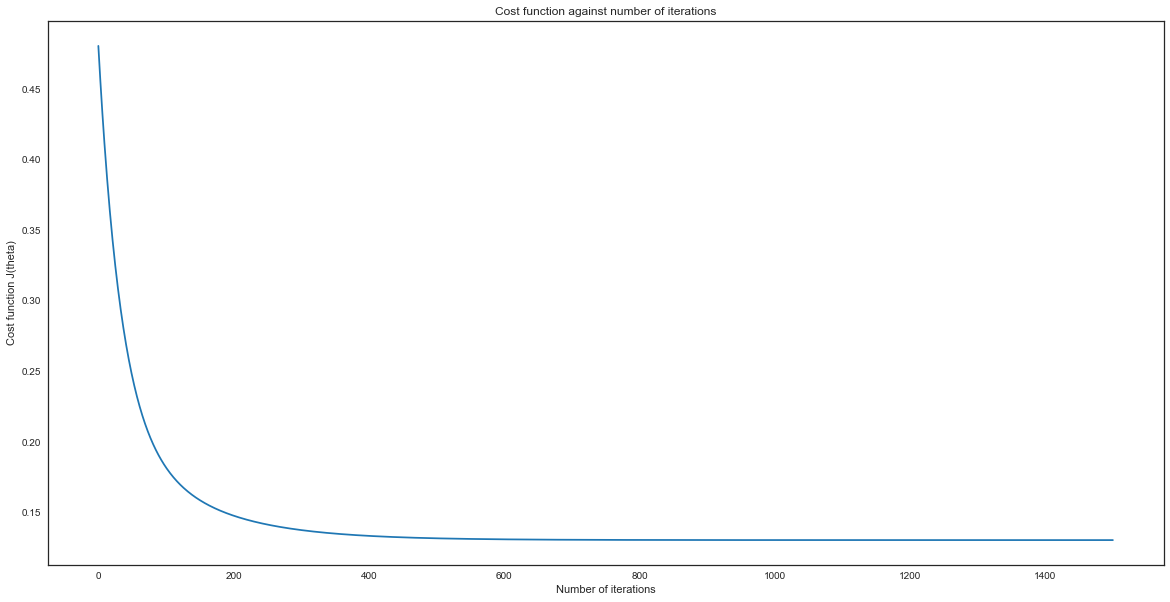

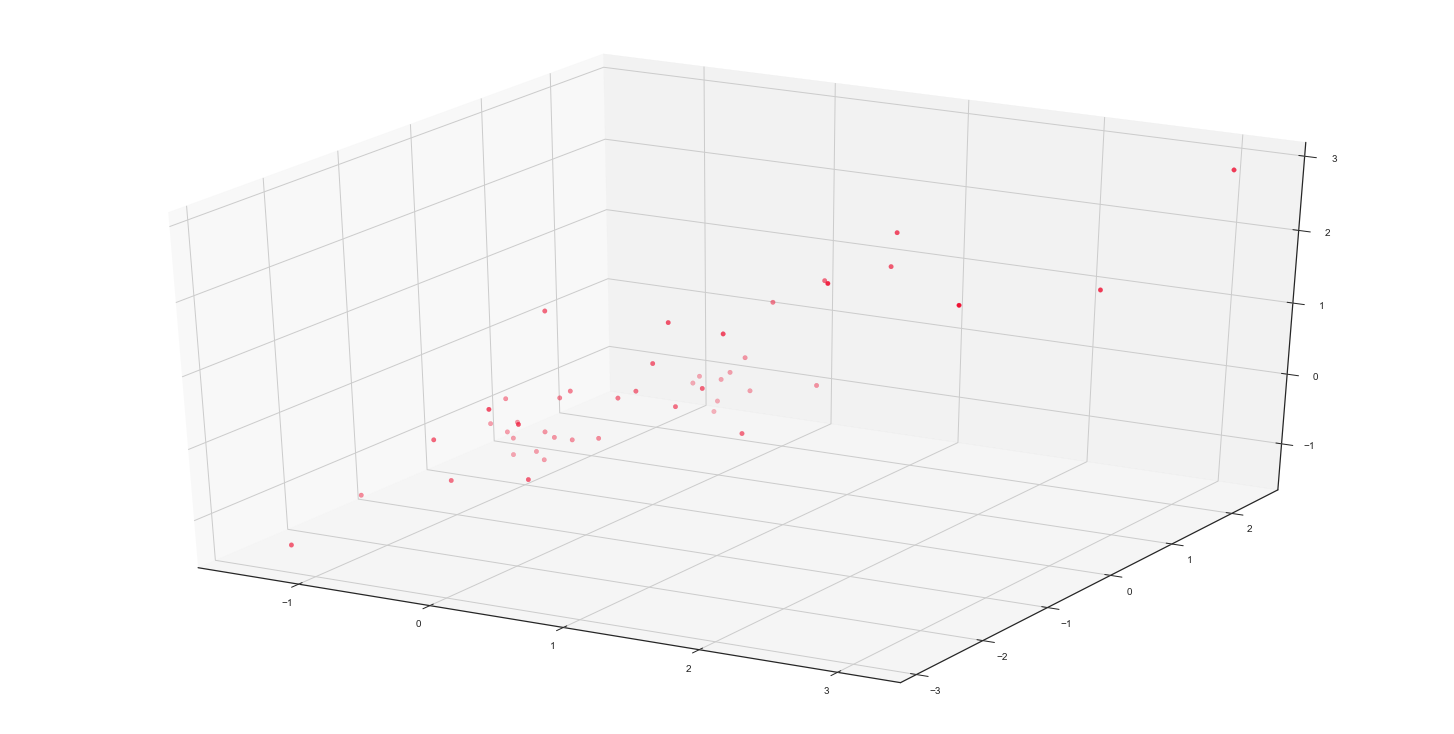

In [807]:
gradientDescent(X, y, theta, alpha, num_iters)

In [808]:
plt.close('all')

Regularized Linear Regression with Gradient Descent
=================

We will modify our gradient descent function to separate out θ0 from the rest of the parameters because we do not want to penalize θ

In [809]:
Math(r'\begin{align*}& \text{Repeat}\ \lbrace \newline& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline& \rbrace\end{align*}')

<IPython.core.display.Math object>

The term from the equation above is the regularization:

In [810]:
Math(r'\frac{\lambda}{m}\theta_j')

<IPython.core.display.Math object>

In [811]:
Math(r'min_\theta\ \dfrac{1}{2m}\ \left[ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\ \sum_{j=1}^n \theta_j^2 \right]')

<IPython.core.display.Math object>

In [812]:
Math(r'\theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}')

<IPython.core.display.Math object>

Normal Equation
===============

In [813]:
Math(r'\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}')

<IPython.core.display.Math object>

In [814]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [815]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex5/'
data = loadmat(location+'ex5data1.mat')

In [816]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [817]:
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

m = X.shape[0]

**Plot data**

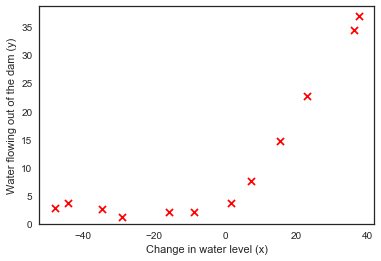

In [818]:
plt.scatter(X, y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

In [819]:
plt.close()

**Regularized Cost Function**

In [820]:
theta = np.array([[1] , [1]])
X_padded = np.column_stack((np.ones((m,1)), X))

In [821]:
def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    # Initialize some useful values
    m = len(y) # number of training examples

    # force to be 2D vector
    theta = np.reshape(theta, (-1,y.shape[1]))

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    # cost function
    J = (1./(2*m)) * np.power( (np.dot(X, theta) - y) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()

    # regularized gradient
    grad = (1./m) * np.dot( X.T, np.dot(X,theta) - y) + ( float(lambda_val) / m)*theta

    # unregularize first gradient
    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - y)
    grad[0] = grad_no_regularization[0]
    #Return Grad or J
    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 

In [822]:
J = linearRegCostFunction(X_padded, y, theta, 1)

**Regularized Gradient**

In [823]:
from numpy.linalg import inv
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.optimize import minimize

def trainLinearReg(X,y, Lambda):  
    n=len(X)
    X=np.array(X)
    y=np.array(y)
    # Initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))    
    # Short hand for cost function to be minimized
    def costFunc(theta):
        return linearRegCostFunction(X, y, theta, lambda_val, True)
    # Now, costFunction is a function that takes in only one argument
    maxiter = 200
    results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)
    theta = results['x']

    return theta

In [824]:
theta = np.array([[1] , [1]])
J, grad = linearRegCostFunction(X_padded, y, theta, 1, True)

In [825]:
print('Gradient at theta = ',grad,'\n \n(this value should be about [-15.303016; 598.250744]')

Gradient at theta =  [ -15.30301567  598.25074417] 
 
(this value should be about [-15.303016; 598.250744]


**Train Linear Regression**
(Lambda=0)

In [826]:
#  Train linear regression with lambda = 0
lambda_val = 0
theta = trainLinearReg(X_padded, y, lambda_val)
plt.close()

Text(0,0.5,'Water flowing out of the dam (y)')

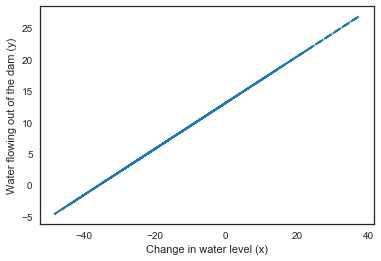

In [827]:
#  Plot fit over the data
plt.scatter(X, y, s=50, c='r', marker='x', linewidths=1)
plt.plot(X, np.dot(np.column_stack((np.ones((m,1)), X)), theta), '--', linewidth=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')


** Learning Curve for Linear Regression **

In [828]:
def learningCurve(X, y, Xval, yval, lambda_val):
    # Number of training examples
    m = len(X)#

    # You need to return these values correctly
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))#

    for i in range(1,m+1):
        # define training variables for this loop
        X_train = X[:i]
        y_train = y[:i]

        # learn theta parameters with current X_train and y_train
        theta = trainLinearReg(X_train, y_train, lambda_val)#

        # fill in error_train(i) and error_val(i)
        #   note that for error computation, we set lambda_val = 0 in the last argument
        error_train[i-1] = linearRegCostFunction(X_train, y_train, theta, 0)
        error_val[i-1] = linearRegCostFunction(Xval,yval, theta, 0)
                
    return error_train, error_val

In [829]:
plt.close()
lambda_val = 0
error_train, error_val = learningCurve(np.column_stack((np.ones((m,1)), X)), y, np.column_stack((np.ones((Xval.shape[0], 1)), Xval)), yval, lambda_val)

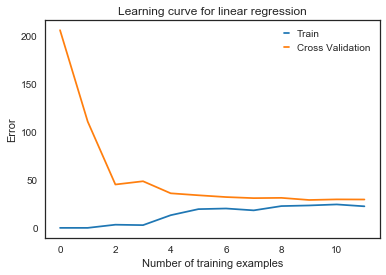

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	205.121096

  	2		0.000000	110.300366

  	3		3.286595	45.010231

  	4		2.842678	48.368911

  	5		13.154049	35.865165

  	6		19.443963	33.829962

  	7		20.098522	31.970986

  	8		18.172859	30.862446

  	9		22.609405	31.135998

  	10		23.261462	28.936207

  	11		24.317250	29.551432

  	12		22.373906	29.433818



In [830]:
p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show(block=False)
plt.axis([0, 13, 0, 150])
plt.close()
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

In [831]:
# resets plot 
plt.close()

In [832]:
def polyFeatures(X, p):
    X_poly = X
    # if p is equal or greater than 2
    if p >= 2:
        # for each number between column 2 (index 1) and last column
        for k in range(1,p):
            # add k-th column of polynomial features where k-th column is X.^k
            X_poly = np.column_stack((X_poly, np.power(X,k+1)))
            
    return X_poly

In [833]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

**Creating Poly Features for Datasets**

In [834]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.column_stack((np.ones((m,1)), X_poly)) # Add Ones

In [835]:
# # Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.column_stack((np.ones((X_poly_test.shape[0],1)), X_poly_test)) # Add Ones

In [836]:
# # Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.column_stack((np.ones((X_poly_val.shape[0],1)), X_poly_val)) # Add Ones

In [837]:
print('Normalized Training Example 1:')
print((X_poly[1, :]))

Normalized Training Example 1:
[ 1.         -0.8389201   0.0013142  -0.25896174 -0.34156482  0.09754927
 -0.45519664  0.26677343 -0.46887381]


**Learning Curve for Polynomial Regression**


In [838]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    # Hold on to the current figure
    #plt.hold(True)

    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05)) # 1D vector

    # Map the X values 
    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly/sigma

    # Add ones
    X_poly = np.column_stack((np.ones((x.shape[0],1)), X_poly))

    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', linewidth=2)

    # Hold off to the current figure
    #plt.hold(False)

In [839]:
lambda_val = 1;
theta = trainLinearReg(X_poly, y, lambda_val)

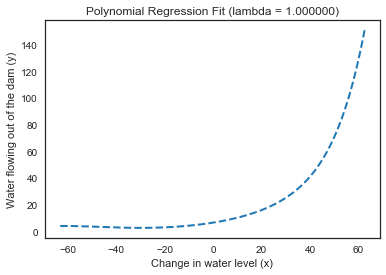

In [840]:
# Plot training data and fit
# resets plot 
plt.close()
plt.figure(1)

plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit (lambda = {:f})'.format(lambda_val))
plt.show(block=False)

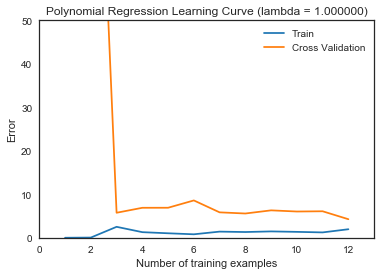

Polynomial Regression (lambda = 1.000000)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846731

  	2		0.042839	143.502495

  	3		2.515217	5.749648

  	4		1.285542	6.890110

  	5		1.028307	6.900155

  	6		0.794844	8.581363

  	7		1.409964	5.842339

  	8		1.316231	5.575941

  	9		1.458736	6.300211

  	10		1.353304	6.033562

  	11		1.228546	6.089839

  	12		1.958697	4.263453



In [841]:
plt.figure(2)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_val)
p1, p2 = plt.plot(range(1,m+1), error_train, range(1,m+1), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 50])
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.show(block=False)

print('Polynomial Regression (lambda = {:f})\n\n'.format(lambda_val))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))

 **Validation for Selecting Lambda**

In [842]:
def validationCurve(X, y, Xval, yval):

    # Selected values of lambda (you should not change this)
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

    # You need to return these variables correctly.
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))

    for i in range(len(lambda_vec)):
        lambda_val = lambda_vec[i]

        # learn theta parameters with current lambda value
        theta = trainLinearReg(X, y, lambda_val)

        # fill in error_train[i] and error_val[i]
        #   note that for error computation, we set lambda = 0 in the last argument
        error_train[i] = linearRegCostFunction(X,    y,    theta, 0)
        error_val[i]   = linearRegCostFunction(Xval, yval, theta, 0)
         
    return lambda_vec, error_train, error_val

In [843]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

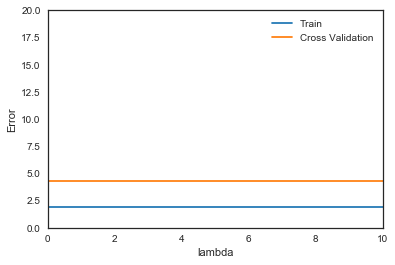

lambda		Train Error	Validation Error

0.0 [ 1.95869712] [ 4.26345252]
0.001 [ 1.95869712] [ 4.26345252]
0.003 [ 1.95869712] [ 4.26345252]
0.01 [ 1.95869712] [ 4.26345252]
0.03 [ 1.95869712] [ 4.26345252]
0.1 [ 1.95869712] [ 4.26345252]
0.3 [ 1.95869712] [ 4.26345252]
1.0 [ 1.95869712] [ 4.26345252]
3.0 [ 1.95869712] [ 4.26345252]
10.0 [ 1.95869712] [ 4.26345252]


In [844]:
plt.close('all')
p1, p2 = plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.xlabel('lambda')
plt.ylabel('Error')
plt.axis([0, 10, 0, 20])
plt.show(block=False)

print('lambda\t\tTrain Error\tValidation Error\n')
for i in range(len(lambda_vec)):
    print(lambda_vec[i], error_train[i], error_val[i])


**Computing test set error on the best lambda found**

In [845]:
# best lambda value from previous step
lambda_val = 3;

# note that we're using X_poly - polynomial linear regression with polynomial features
theta = trainLinearReg(X_poly, y, lambda_val)

# because we're using X_poly, we also have to use X_poly_test with polynomial features
error_test = linearRegCostFunction(X_poly_test, ytest, theta, 0)
print('Test set error: {:f}\n'.format(error_test)) # expected 3.859

Test set error: 3.572020



**Plot learning curves with randomly selected examples**

In [846]:
# lambda_val value for this step
lambda_val = 0.01

# number of iterations
times = 50

# initialize error matrices
error_train_rand = np.zeros((m, times))
error_val_rand = np.zeros((m, times))

In [847]:
for i in range(1,m+1):

    for k in range(times):

        # choose i random training examples
        rand_sample_train = np.random.permutation(X_poly.shape[0])
        rand_sample_train = rand_sample_train[:i]

        # choose i random cross validation examples
        rand_sample_val   = np.random.permutation(X_poly_val.shape[0])
        rand_sample_val   = rand_sample_val[:i]

        # define training and cross validation sets for this loop
        X_poly_train_rand = X_poly[rand_sample_train,:]
        y_train_rand      = y[rand_sample_train]
        X_poly_val_rand   = X_poly_val[rand_sample_val,:]
        yval_rand         = yval[rand_sample_val]
        #Commented out for github so this isn't too long!
        #print(X_poly_train_rand.shape)
        #print(y_train_rand.shape)     
        #print(X_poly_val_rand.shape)   
        #print(yval_rand.shape)                 

        # note that we're using X_poly_train_rand and y_train_rand in training
        theta = trainLinearReg(X_poly_train_rand, y_train_rand, lambda_val)
            
        # we use X_poly_train_rand, y_train_rand, X_poly_train_rand, X_poly_val_rand
        error_train_rand[i-1,k] = linearRegCostFunction(X_poly_train_rand, y_train_rand, theta, 0)
        error_val_rand[i-1,k] = linearRegCostFunction(X_poly_val_rand, yval_rand, theta, 0)

In [848]:
error_train = np.mean(error_train_rand, axis=1)
error_val   = np.mean(error_val_rand, axis=1)

# resets plot 
plt.close()

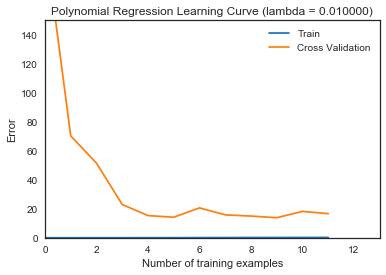

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	205.921571

  	2		0.007391	70.263679

  	3		0.017772	51.513978

  	4		0.017460	22.940171

  	5		0.050558	15.284227

  	6		0.058350	14.148116

  	7		0.086265	20.599326

  	8		0.125264	15.798914

  	9		0.158126	14.963251

  	10		0.177778	13.815964

  	11		0.204082	18.184076

  	12		0.217958	16.615635



In [849]:
p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title('Polynomial Regression Learning Curve (lambda = {:f})'.format(lambda_val))
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
plt.show(block=False)

print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{:d}\t\t{:f}\t{:f}\n'.format(i+1, error_train[i], error_val[i]))

In [850]:
plt.close('all')

Regularized Linear Regression with Gradient Descent (Using Scikit Learn)
==========================================

In [851]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex5/'
data = loadmat(location+'ex5data1.mat')

In [852]:
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


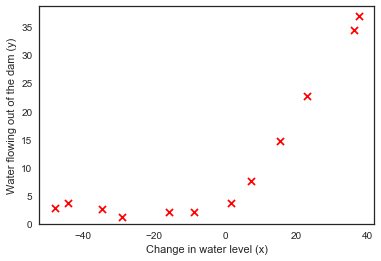

In [853]:
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

In [854]:
def linearRegCostFunction(theta, X, y, reg):
    m = y.size
    h = X.dot(theta)
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    return(J)

In [855]:
def lrgradientReg(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1,1))
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)] 
    return(grad.flatten())

In [856]:
initial_theta = np.ones((X_train.shape[1],1))
cost = linearRegCostFunction(initial_theta, X_train, y_train, 0)
gradient = lrgradientReg(initial_theta, X_train, y_train, 0)
print(cost)
print(gradient)

303.951525554
[ -15.30301567  598.16741084]


In [857]:
def trainLinearReg(X, y, reg):
    #initial_theta = np.zeros((X.shape[1],1))
    initial_theta = np.array([[15],[15]])
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(linearRegCostFunction, initial_theta, args=(X,y,reg), method=None, jac=lrgradientReg,
                   options={'maxiter':5000})
    return(res)

In [858]:
fit = trainLinearReg(X_train, y_train, 0)
fit

      fun: 1604.4002999186634
 hess_inv: array([[ 1.03142187,  0.00617881],
       [ 0.00617881,  0.001215  ]])
      jac: array([  3.42437190e-12,  -5.70370264e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 13.08790351,   0.36777923])

**Comparison: coefficients and cost obtained with LinearRegression in Scikit-learn**

In [859]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train.ravel())
print(regr.coef_)
print(linearRegCostFunction(regr.coef_, X_train, y_train, 0))

[ 13.08790351   0.36777923]
1604.40029992


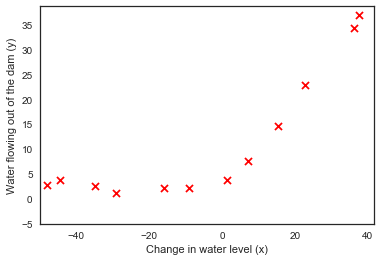

In [860]:
plt.plot(np.linspace(-50,40), (fit.x[0]+ (fit.x[1]*np.linspace(-50,40))), label='Scipy optimize')
#plt.plot(np.linspace(-50,40), (regr.coef_[0]+ (regr.coef_[1]*np.linspace(-50,40))), label='Scikit-learn')
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc=4);

In [861]:
def learningCurve(X, y, Xval, yval, reg):
    m = y.size
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in np.arange(m):
        res = trainLinearReg(X[:i+1], y[:i+1], reg)
        error_train[i] = linearRegCostFunction(res.x, X[:i+1], y[:i+1], reg)
        error_val[i] = linearRegCostFunction(res.x, Xval, yval, reg)
    
    return(error_train, error_val)

In [862]:
t_error, v_error = learningCurve(X_train, y_train, Xval, yval, 0)

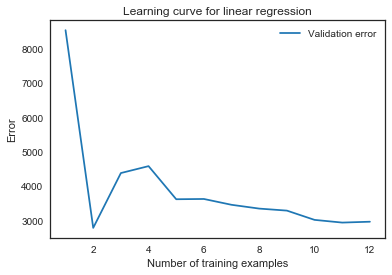

In [863]:
plt.plot(np.arange(1,13), t_error, label='Training error')
plt.plot(np.arange(1,13), v_error, label='Validation error')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

In [865]:
plt.close()

Polynomial regression (Scikit-learn)
====================

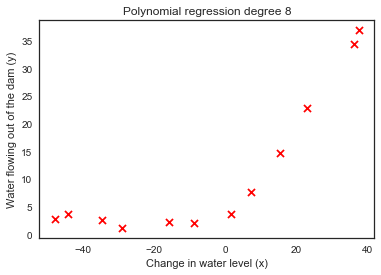

In [866]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train[:,1].reshape(-1,1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y_train)

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, y_train)

# plot range for x
plot_x = np.linspace(-60,45)
# using coefficients to calculate y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = regr3.intercept_ + np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);



In [868]:
plt.close()


Normal Logistic Regression Maximum Likelihood Estimates (Using Statsmodels)
================

In [869]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LogisticRegression
from pandas.core import datetools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [870]:
data = pd.read_csv('C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex2/ex2data1.txt',header=None, 
                   names=['Exam1', 'Exam2', 'Admitted'])

In [871]:
data.head()

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

In [872]:
X = data.copy() # ou training data

In [873]:
y = X.Admitted.copy() # copy “y” column values out
X.drop(['Admitted'], axis=1, inplace=True) # then, drop y column

In [874]:
# manually add the intercept
X['intercept'] = 1.0  # so we don't need to use sm.add_constant every time

In [875]:
def logitRegress(X,y):
    print('Statsmodels Results')
    model = sm.Logit(y, X)
    result = model.fit()
    print(result.summary(),'\n')
    #print(result.params,'\n')
    #print(result.conf_int())
    return 

In [876]:
logitRegress(X,y)

Statsmodels Results
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Mar 2018   Pseudo R-squ.:                  0.6976
Time:                        16:11:51   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                 4.067e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Exam1          0.2062      0.048      4.296      0.000       0.112       0.300
Exam2    

Gradient Descent for Logistic Regression
===================

Logistic Regression outputs a binary classification in 0 or 1

In [877]:
Math(r'\begin{align*}& h_\theta (x) =  g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}')

<IPython.core.display.Math object>

Where:

In [878]:
Math(r'0 \leq h_\theta (x) \leq 1')

<IPython.core.display.Math object>

In [879]:
Math(r'\begin{align*}& \theta^T x \geq 0 \Rightarrow y = 1 \newline& \theta^T x < 0 \Rightarrow y = 0 \newline\end{align*}')

<IPython.core.display.Math object>

**Cost Function**

In [880]:
Math(r'\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}')

<IPython.core.display.Math object>

Simplified as:

In [881]:
Math(r'J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))]')

<IPython.core.display.Math object>

Here is the **Vectorized** Implementation:

In [882]:
Math(r'\begin{align*} & h = g(X\theta)\newline & J(\theta)  = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right)\end{align*}')

<IPython.core.display.Math object>

**Gradient Descent**

In [883]:
Math(r'\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}')

<IPython.core.display.Math object>

Here is the **Vectorized** implementation:

In [884]:
Math(r'\theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y})')

<IPython.core.display.Math object>

Here is the **Partial Derivative**:

In [885]:
Math(r'\begin{align*}\frac{\partial}{\partial \theta_j} J(\theta) &= \frac{\partial}{\partial \theta_j} \frac{-1}{m}\sum_{i=1}^m \left [ y^{(i)} log (h_\theta(x^{(i)})) + (1-y^{(i)}) log (1 - h_\theta(x^{(i)})) \right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} \frac{\partial}{\partial \theta_j} log (h_\theta(x^{(i)}))   + (1-y^{(i)}) \frac{\partial}{\partial \theta_j} log (1 - h_\theta(x^{(i)}))\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)})}{h_\theta(x^{(i)})}   + \frac{(1-y^{(i)})\frac{\partial}{\partial \theta_j} (1 - h_\theta(x^{(i)}))}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} \frac{\partial}{\partial \theta_j} \sigma(\theta^T x^{(i)})}{h_\theta(x^{(i)})}   + \frac{(1-y^{(i)})\frac{\partial}{\partial \theta_j} (1 - \sigma(\theta^T x^{(i)}))}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} \sigma(\theta^T x^{(i)}) (1 - \sigma(\theta^T x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{h_\theta(x^{(i)})}   + \frac{- (1-y^{(i)}) \sigma(\theta^T x^{(i)}) (1 - \sigma(\theta^T x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     \frac{y^{(i)} h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{h_\theta(x^{(i)})}   - \frac{(1-y^{(i)}) h_\theta(x^{(i)}) (1 - h_\theta(x^{(i)})) \frac{\partial}{\partial \theta_j} \theta^T x^{(i)}}{1 - h_\theta(x^{(i)})}\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} (1 - h_\theta(x^{(i)})) x^{(i)}_j - (1-y^{(i)}) h_\theta(x^{(i)}) x^{(i)}_j\right ] \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} (1 - h_\theta(x^{(i)})) - (1-y^{(i)}) h_\theta(x^{(i)}) \right ] x^{(i)}_j \newline&= - \frac{1}{m}\sum_{i=1}^m \left [     y^{(i)} - y^{(i)} h_\theta(x^{(i)}) - h_\theta(x^{(i)}) + y^{(i)} h_\theta(x^{(i)}) \right ] x^{(i)}_j \newline&= - \frac{1}{m}\sum_{i=1}^m \left [ y^{(i)} - h_\theta(x^{(i)}) \right ] x^{(i)}_j  \newline&= \frac{1}{m}\sum_{i=1}^m \left [ h_\theta(x^{(i)}) - y^{(i)} \right ] x^{(i)}_j\end{align*}')

<IPython.core.display.Math object>

...And the **Vectorized Implementation**:

In [886]:
Math(r'\nabla J(\theta) = \frac{1}{m} \cdot  X^T \cdot \left(g\left(X\cdot\theta\right) - \vec{y}\right)')

<IPython.core.display.Math object>

In [887]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fmin_bfgs
import warnings
warnings.filterwarnings("ignore")

In [888]:
data = np.loadtxt('C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex2/ex2data1.txt',delimiter=",")

m,n = data.shape
X = np.array(np.column_stack((np.ones(m),data[:,:-1])))
y = np.array(data[:,2].reshape(m,1))
theta = np.array(np.zeros(n).reshape(n,1))

In [889]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [890]:
def costFunction(theta):
    h = sigmoid(X.dot(theta))
    cost = (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h)))/m
    result = cost[0]
    if np.isnan(result):
        return np.inf
    return result

In [891]:
costFunction(theta)

array([ 0.69314718])

In [892]:
def gradientDescent(theta):
    theta = theta.reshape(-1, 1)
    h = sigmoid(X.dot(theta))
    grad = ((h-y).T.dot(X)).T/m
    return grad.flatten()


In [893]:
gradientDescent(theta)

array([ -0.1       , -12.00921659, -11.26284221])

In [894]:
def fmin():
    initial_theta=np.zeros(n)
    minTheta=fmin_bfgs(costFunction,initial_theta,fprime=gradientDescent)
    return minTheta


In [895]:
minTheta = fmin()

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 34
         Gradient evaluations: 30


In [896]:
minTheta

array([-25.16131634,   0.2062316 ,   0.20147143])

In [897]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta))
    #if the probability is greater than 50% or better than flipping a coin giving categorize as 1
    return [1 if x >= 0.5 else 0 for x in probability]

In [898]:
theta_min = np.matrix(fmin())
predictions = predict(theta_min.T, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('         Accuracy = {0}'. format(accuracy))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 34
         Gradient evaluations: 30
         Accuracy = 89


Regularized Logistic Regression
===================

Regularized Logistic Regression is the same as normal logistic regression but adding an addition regularization term:

In [899]:
Math(r'\frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2')

<IPython.core.display.Math object>

**Cost Function**

In [900]:
Math(r'J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2')

<IPython.core.display.Math object>

**Gradient Descent**

Just like with linear regression, we will want to separately update θ0 and the rest of the parameters because we do not want to regularize θ0.

In [901]:
Math(r'\begin{align*}& \text{Repeat}\ \lbrace \newline& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline& \rbrace\end{align*}')

<IPython.core.display.Math object>

In [902]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fmin_bfgs
import scipy.optimize as opt 
#%pylab inline

In [903]:
data = pd.read_csv('C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex2/ex2data2.txt',header=None, 
                   names=['MicroChipT1', 'MicroChipT2', 'PassFail'])

In [904]:
data.head()

   MicroChipT1  MicroChipT2  PassFail
0     0.051267      0.69956         1
1    -0.092742      0.68494         1
2    -0.213710      0.69225         1
3    -0.375000      0.50219         1
4    -0.513250      0.46564         1

In [905]:
def map_features(f1, f2, order=1):
    '''map the f1 and f2 to its higher order polynomial'''
    temp=[np.ones(len(f1))]
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(f1, i - j) * np.power(f2, j)
    return np.vstack(iter()).T

In [906]:
m,n = data.shape
X = np.array(data.iloc[:,:(n)])
y = np.array(data.iloc[:,2].values.reshape(m,1))

In [907]:
temp1=pd.DataFrame(np.ones(m))
temp2=pd.DataFrame(map_features(X[:,0], X[:,1], order=6))
X=pd.concat([temp1, temp2],axis=1)
m,n = X.shape
initial_theta = np.zeros(n)

Cost Function

In [908]:
Math(r'J(\theta) = \frac{1}{m} \sum_{i=1}^m y^{(i)}(-\log(h_\theta(x^{(i)}))) + (1 - y^{(i)})(-\log(1 - h_\theta(x^{(i)}))) + \dfrac{\lambda}{2m}\sum_{j=1}^n \Theta^2_j')

<IPython.core.display.Math object>

In [909]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunctionReg(theta, X, y, Lambda): 
    #theta[0]=0
    theta=np.matrix(theta)
    grad=np.zeros(np.size(theta))
    X=np.matrix(X)
    y=np.matrix(y)
    m=len(y)
    J=0
    h=sigmoid(X.dot(theta.T))
    J=(1/m)*(-y.T*(np.log(h))-(1-y).T*(np.log(1-h)))+Lambda/(2*m)*theta.dot(theta.T)
    grad=(1/m)*(X.T*(h-y)+Lambda*theta.T)
    if np.isnan(J):
        return np.inf
    return np.array([J.item()])#,np.array(grad).flatten()

def gradientDescent(theta, X, y, Lambda):
    theta = theta.reshape(-1, 1)
    theta=np.matrix(theta)
    grad=np.zeros(np.size(theta))
    X=np.matrix(X)
    y=np.matrix(y)
    m=len(y)
    h = sigmoid(X.dot(theta))
    theta = ((h-y).T.dot(X)).T/m
    return np.array(theta).flatten()

def predict(theta, X):
    m = np.size(X)
    p = np.zeros(m)
    p=sigmoid(X*(theta))>=0.5;
    return p

In [910]:
L=1
grad=gradientDescent(initial_theta, X, y, L)
cost=costFunctionReg(initial_theta, X, y, L)

In [911]:
cost

array([ 0.69314718])

In [912]:
grad[:10]

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02])

In [913]:
X.shape, y.shape

((118, 28), (118, 1))

In [914]:
cost=costFunctionReg(initial_theta, X, y, L)
grad=gradientDescent(initial_theta, X, y, L)

In [915]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gradientDescent, args=(X, y, L))
result

(array([ 1.60695173,  1.1560198 ,  1.96230334, -3.05065126, -1.6570303 ,
        -1.91905334,  0.57020797, -0.68153401, -0.71446893,  0.04581306,
        -2.05403844, -0.19543688, -1.06002902, -0.50146861, -1.49394725,
         0.08870358, -0.37553852, -0.16212869, -0.476704  , -0.4992825 ,
        -0.25753319, -1.25322502,  0.0080483 , -0.51945933, -0.03978317,
        -0.54273817, -0.21843762, -0.93051019]), 85, 4)

Regularized Logistic Regression (Scikit Learn)
=================

In [916]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [917]:
data = pd.read_csv('C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex2/ex2data2.txt',header=None, 
                   names=['MicroChipT1', 'MicroChipT2', 'PassFail'])

In [918]:
data.head()

   MicroChipT1  MicroChipT2  PassFail
0     0.051267      0.69956         1
1    -0.092742      0.68494         1
2    -0.213710      0.69225         1
3    -0.375000      0.50219         1
4    -0.513250      0.46564         1

In [919]:
m,n = data.shape
X = np.array(data.iloc[:,:(n-1)])
y = np.array(data.iloc[:,2].values.reshape(m,1))

In [920]:
def map_features(f1, f2, order=1):
    '''map the f1 and f2 to its higher order polynomial'''
    temp=[np.ones(len(f1))]
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(f1, i - j) * np.power(f2, j)
    return np.vstack(iter()).T

In [921]:
temp1=pd.DataFrame(np.ones(m))
temp2=pd.DataFrame(map_features(X[:,0], X[:,1], order=6))
X=pd.concat([temp1, temp2],axis=1)
m,n = X.shape
initial_theta = np.zeros(n)

In [922]:
from sklearn import linear_model

def regLogitRegress(X,y):
    model = linear_model.LogisticRegression(penalty='l2', C=1.0)
    model.fit(X, y.ravel())
    Accuracy=model.score(X, y)
    print('The accuracy of the model:',Accuracy)
    coeff_df = pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))
    Y_mean=y.mean()
    print('Target average:',Y_mean)
    return coeff_df

In [923]:
regLogitRegress(X,y)

The accuracy of the model: 0.830508474576
Target average: 0.491525423729


     0                   1
0    0    [0.601812573966]
1    0    [0.612629316441]
2    1     [1.17369724053]
3    2    [-1.94159986886]
4    3   [-0.916522063461]
5    4    [-1.34600068611]
6    5    [0.125383586379]
7    6   [-0.367177404288]
8    7   [-0.350873791425]
9    8   [-0.174398412913]
10   9    [-1.43997025503]
11  10  [-0.0497344651764]
12  11   [-0.610662396176]
13  12   [-0.271875621667]
14  13    [-1.17708203047]
15  14    [-0.24264323148]
16  15   [-0.206548804139]
17  16  [-0.0439377550875]
18  17   [-0.279070869335]
19  18   [-0.290912503127]
20  19   [-0.463050034188]
21  20    [-1.03941696784]
22  21   [0.0285352187939]
23  22   [-0.292513366994]
24  23   [0.0164898747318]
25  24   [-0.328180750594]
26  25     [-0.1407499068]
27  26   [-0.928453569218]

Multi-Class Classification (One vs All / One vs Rest)
===============

Multiclass classification is essentially logistic regression that outputs classifications that are not binary providing, such as 0,1,2,3.....n.

In [924]:
Math(r'\begin{align*}& y \in \lbrace0, 1 ... n\rbrace \newline& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta) \newline& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta) \newline& \cdots \newline& h_\theta^{(n)}(x) = P(y = n | x ; \theta) \newline& \mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )\newline\end{align*}')

<IPython.core.display.Math object>

In [925]:
Math(r'h_\Theta(x) =\begin{bmatrix}1 \newline 0 \newline 0 \newline 0 \newline  \end{bmatrix},\begin{bmatrix}0 \newline 1 \newline 0 \newline 0 \newline  \end{bmatrix},\begin{bmatrix}0 \newline 0 \newline 1 \newline 0 \newline  \end{bmatrix}...\begin{bmatrix}0 \newline 0 \newline 0 \newline n \newline  \end{bmatrix}')

<IPython.core.display.Math object>

In [926]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
#%matplotlib inline

# pick random 100 handwriting
import random

In [927]:
indexes = random.sample(range(0, 5000), 100)
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex3/'
data = loadmat(location+'ex3data1.mat')

# pick random 100 handwriting
indexes = random.sample(range(0, 5000), 100)

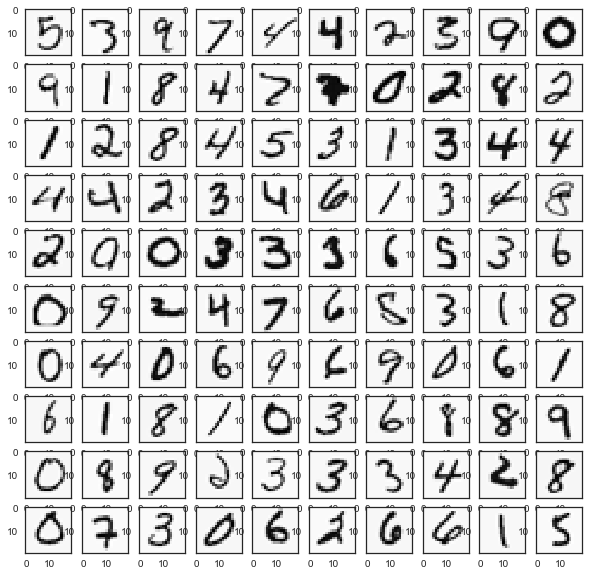

In [928]:
figure = plt.figure(figsize=(10, 10))
for index, i in enumerate(indexes):
    plt.subplot(10, 10, index + 1)
    plt.axis('off')
    plt.imshow(data['X'][i].reshape(20, 20).transpose(), cmap='Greys')

In [929]:
X=np.array(data['X']) 
y=np.array(data['y'])
m,n = X.shape
initial_theta=np.zeros(n)
num_labels=10
input_layer_size  = 400
#randperm comand in octave (list of random permutations)
#rand_indices = randperm(m);
#sel = X(rand_indices(1:100), :); (Select 100 of of the random permutations)
# displayData(sel) (Display the selected data)
L=1

Test case for lrCostFunction()

In [930]:
theta_t=np.array([[-2],[-1],[1],[2]])
X_t=np.array([[1,1,1,1,1],[.1,.2,.3,.4,.5],[.6,.7,.8,.9,1],[1.1,1.2,1.3,1.4,1.5]]).T
y_t=np.array([[1],[0],[1],[0],[1]])
lambda_t=3

In [931]:
theta_t

array([[-2],
       [-1],
       [ 1],
       [ 2]])

In [932]:
X_t

array([[ 1. ,  0.1,  0.6,  1.1],
       [ 1. ,  0.2,  0.7,  1.2],
       [ 1. ,  0.3,  0.8,  1.3],
       [ 1. ,  0.4,  0.9,  1.4],
       [ 1. ,  0.5,  1. ,  1.5]])

In [933]:
y_t

array([[1],
       [0],
       [1],
       [0],
       [1]])

In [934]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [935]:
initial_theta = initial_theta.reshape(-1, 1)

In [936]:
def lrCostFunction(theta, X, y, Lambda): 
    theta = theta.reshape(-1, 1)
    theta=np.matrix(theta)
    grad=np.zeros(np.size(theta))
    X=np.matrix(X)
    y=np.matrix(y)
    
    m=len(y)
    J=0
    h=sigmoid(X*(theta))
    
    theta_reg=theta.copy()
    theta_reg[0]=0 #set intercept of theta reg to 0    
    theta_reg=np.matrix(theta_reg) #convert to matrix
    J=(1/m)*((-y.T*(np.log(h)))-((1-y).T*np.log(1-h)))+(Lambda/(2*m)*theta_reg.T*theta_reg) #OMFG that took forever!
    grad=(1/m)*(X.T*(h - y)+Lambda*theta_reg)
    return np.array([J.item()])#,np.array(grad)

In [937]:
J=lrCostFunction(theta_t, X_t, y_t, lambda_t)

In [938]:
def gradient(theta, X, y, Lambda):
    theta = theta.reshape(-1, 1)
    theta=np.matrix(theta)
    grad=np.zeros(np.size(theta))
    X=np.matrix(X)
    y=np.matrix(y)
    
    m=len(y)
    J=0
    theta_reg=theta.copy()
    theta_reg[0]=0 #set intercept of theta reg to 0    
    theta_reg=np.matrix(theta_reg) #convert to matrix
    
    h=sigmoid(X*(theta))
    grad=(1/m)*(X.T*(h-y)+Lambda*theta_reg)
    return np.array(grad).ravel()

In [939]:
gradient(theta_t, X_t, y_t, lambda_t)

array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296])

In [940]:
from scipy.optimize import minimize

def oneVsAll(X, y, num_labels, Lambda):
    m,n=X.shape
    
    # k X (n + 1) array for the parameters of each of the k classifiers
    all_theta = np.zeros((num_labels, n + 1))
    # insert a column of ones at the beginning for the intercept term
    X = np.column_stack((np.ones((m, 1)), X))
    # labels are 1-indexed instead of 0-indexed
    for i in range(1, num_labels + 1):
        theta = np.zeros(n + 1)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (m, 1))
        # minimize the objective function
        fmin = minimize(fun=lrCostFunction, x0=theta, args=(X, y_i, Lambda), method='TNC', jac=gradient)
        all_theta[i-1,:] = fmin.x
    return all_theta

In [941]:
all_theta=oneVsAll(X, y, num_labels, L)

In [942]:
def predictOneVsAll(theta, X):
    m,n=X.shape
    num_labels = np.size(theta)

    # You need to return the following variables correctly 
    p = np.zeros((np.size(X), 1))
    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m, 1)), X))
    p = np.argmax(sigmoid(np.dot(X,all_theta.T)), axis=1)
    return p

In [943]:
pred = predictOneVsAll(all_theta, X)

print('Training Set Accuracy: {:f}'.format((np.mean(pred == y.T%10)*100)))
print('Training Set Accuracy for 1:  {:f}'.format(np.mean(pred[500:1000]  == y.T.flatten()[500:1000]%10)  * 100))
print('Training Set Accuracy for 2:  {:f}'.format(np.mean(pred[1000:1500] == y.T.flatten()[1000:1500]%10) * 100))
print('Training Set Accuracy for 3:  {:f}'.format(np.mean(pred[1500:2000] == y.T.flatten()[1500:2000]%10) * 100))
print('Training Set Accuracy for 4:  {:f}'.format(np.mean(pred[2000:2500] == y.T.flatten()[2000:2500]%10) * 100))
print('Training Set Accuracy for 5:  {:f}'.format(np.mean(pred[2500:3000] == y.T.flatten()[2500:3000]%10) * 100))
print('Training Set Accuracy for 6:  {:f}'.format(np.mean(pred[3000:3500] == y.T.flatten()[3000:3500]%10) * 100))
print('Training Set Accuracy for 7:  {:f}'.format(np.mean(pred[3500:4000] == y.T.flatten()[3500:4000]%10) * 100))
print('Training Set Accuracy for 8:  {:f}'.format(np.mean(pred[4000:4500] == y.T.flatten()[4000:4500]%10) * 100))
print('Training Set Accuracy for 9:  {:f}'.format(np.mean(pred[4500:5000] == y.T.flatten()[4500:5000]%10) * 100))
print('Training Set Accuracy for 10: {:f}'.format(np.mean(pred[0:500] == y.T.flatten()[0:500]%10) * 100))

Training Set Accuracy: 0.420000
Training Set Accuracy for 1:  0.200000
Training Set Accuracy for 2:  0.800000
Training Set Accuracy for 3:  0.000000
Training Set Accuracy for 4:  0.000000
Training Set Accuracy for 5:  1.000000
Training Set Accuracy for 6:  0.000000
Training Set Accuracy for 7:  0.200000
Training Set Accuracy for 8:  1.000000
Training Set Accuracy for 9:  1.000000
Training Set Accuracy for 10: 0.000000


K-Nearest Neighbors
==========

Euclidean Distance Calculation

In [944]:
Math(r'dist=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...+(x_n-y_n)^2}')

<IPython.core.display.Math object>

In [945]:
Math(r'dist=\sqrt{\sum_{i=1}^m(x_i-y_i)^2}')

<IPython.core.display.Math object>

Source: https://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. 

The kNN task can be broken down into writing 3 primary functions: 
    1. Calculate the distance between any two points

    2. Find the nearest neighbours based on these pairwise distances

    3. Majority vote on a class labels based on the nearest neighbour list 

In [946]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from scipy.spatial.distance import cdist
from scipy.stats import mode

In [947]:
import pandas as pd
import numpy as np
#from itertools import izip
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

In [948]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

In [949]:
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,random_state=1)

In [950]:
#Computes the euclidean distance

def euclidean_distance(a,b):
    distance=np.sqrt(np.dot(a-b,a-b))
    return distance

In [951]:
#Computes cosine similarity between the two vectors

def cosine_distance(a,b):
    distance=1-np.dot(a,b)/np.sqrt(np.dot(a,a)*np.dot(b,b))
    return distance

In [952]:
class KNearestNeighbors(object):
    
    def __init__(self,k,distance):
        self.k=k
        self.distance=distance
        self.X_train=np.asarray([])
        self.y_train=np.asarray([])
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
        
    def predict(self,X):
        X=X.reshape((-1,self.X_train.shape[1]))
        
        #Creating matrix to store distance
        distances=np.zeros((X.shape[0],self.X_train.shape[0]))
        for i,x in enumerate(X):
            for j,x_train in enumerate(self.X_train):
                distances[i,j]=self.distance(x_train,x)
        #Storing the indices of top k elements where distance is in increasing order
        sorted_indices=distances.argsort()[:,:self.k]
        top_k = self.y_train[sorted_indices]  #sort and take top k
        result = np.zeros(X.shape[0])
        for i, values in enumerate(top_k):
            result[i] = Counter(values).most_common(1)[0][0]
        return result

In [953]:
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_samples=50, n_features=5, n_redundant=1, n_informative=2,
                               n_clusters_per_class=2, class_sep=5,
                               random_state=5)

X_train, X_test, y_train, y_test = train_test_split(X, y)



knn = KNearestNeighbors(3, euclidean_distance)
knn.fit(X_train, y_train)

print(len(X_test))
print(len(y_test))

print("\tactual\tpredict\tcorrect?")
for i, (actual, predicted) in enumerate(zip(y_test, knn.predict(X_test))):
    print("%d\t%d\t%d\t%d" % (i, actual, predicted, int(actual == predicted)))

13
13
	actual	predict	correct?
0	1	1	1
1	1	1	1
2	0	0	1
3	0	0	1
4	0	0	1
5	1	1	1
6	0	0	1
7	0	0	1
8	1	1	1
9	0	0	1
10	1	1	1
11	1	1	1
12	0	1	0


In [954]:
#Source: http://www.mien.in/2017/09/25/implementing-knn-from-scratch-in-python/
def get_neighbors_v(train_set, test_set, k):
    ''' return k closet neighbour of test_set in training set'''
    # calculate euclidean distance
    euc_distance = np.sqrt(np.sum((train_set - test_set)**2 , axis=1))
    # return the index of nearest neighbour
    return np.argsort(euc_distance)[0:k]

In [955]:
get_neighbors_v(X,X[0],13)

array([ 0,  3, 46, 47, 19, 24, 20, 18,  9, 32,  8, 44, 34], dtype=int64)

In [956]:
#Source: https://www.researchgate.net/publication/266617010_NumPy_SciPy_Recipes_for_Data_Science_Squared_Euclidean_Distance_Matrices
def compute_squared_EDM_method(X):
    # Grab features (X) and transform into matrix
    X = np.matrix(X)
    #need X dimensions
    m,n=X.shape
    #Compute Gram matrix G
    G = np.dot(X.T, X)
    #Compute matrix H
    H = np.tile(np.diag(G), (n,1))

    return H+H.T-2*G

In [957]:
compute_squared_EDM_method(X)

matrix([[    0.        ,  2422.37309389,  1360.21508001,  2706.14429619,
          1235.45386948],
        [ 2422.37309389,     0.        ,  1195.94536575,   152.39126336,
          1290.21333425],
        [ 1360.21508001,  1195.94536575,     0.        ,   797.21171671,
            77.68690275],
        [ 2706.14429619,   152.39126336,   797.21171671,     0.        ,
           907.0732422 ],
        [ 1235.45386948,  1290.21333425,    77.68690275,   907.0732422 ,
             0.        ]])

In [958]:
#import scipy.spatial as spt
#def compute_squared_EDM_method(X):
#    V=spt.distance.pdist(X.T,'sqeuclidean')
#    return spt.distance.squareform(V)

In [959]:
#Create list of all euclidean distances between the given feature vector 
#   and all other feature vectors in the training set
#dists = cdist(X_train, X)
#  Get the indices of the nearest feature vectors and return a list of their classes
#idx = np.argpartition(dists, k, axis=0)[:k]
#nearest_dists = np.take(Y_train, idx)
#For each feature vector get its predicted class
#out = mode(nearest_dists,axis=0)[0]

In [960]:
dists

array([[  1.29621114,  11.71156022,  15.26205657, ...,   1.72516389,
         10.29918838,  15.38929828],
       [ 10.82966399,   0.        ,  10.46343224, ...,  10.65654908,
         13.26604829,  10.6389512 ],
       [  9.95858074,   2.03291429,  11.8151662 , ...,   9.66425138,
         13.76636367,  11.89616156],
       ..., 
       [ 13.87045024,  16.18572635,   9.12936994, ...,  14.50659687,
          5.26717348,   8.9806147 ],
       [ 14.42579353,  10.11868558,   0.99436318, ...,  14.76861343,
          8.61985269,   0.74789735],
       [ 10.58019707,   1.12972671,  11.28104371, ...,  10.41044269,
         13.59662329,  11.51761324]])

Neural Networks
==============

**Example of simplest neural network with one hidden layer**
   - The first layer is always called the input layer
   - The last layer is called the output layer
   - Layers in-between input and output layers are called hidden layers ( or 'Activation' layers)

In [961]:
Math(r'\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline x_3\end{bmatrix}\rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \newline a_3^{(2)} \newline \end{bmatrix}\rightarrow h_\theta(x)')

<IPython.core.display.Math object>

Activation Function


In [962]:
Math(r'\begin{align*}& a_i^{(j)} = \text{"activation" of unit $i$ in layer $j$} \newline& \Theta^{(j)} = \text{matrix of weights controlling function mapping from layer $j$ to layer $j+1$}\end{align*}')

<IPython.core.display.Math object>

In [963]:
Math(r'\frac{1}{1 + e^{-\theta^Tx}}')

<IPython.core.display.Math object>

- Theta Parameters are now called weights
- the activation function is sigmoid (0 or 1)



**The values for each of the "activation" nodes is obtained as follows:**

In [964]:
Math(r'\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*}')

<IPython.core.display.Math object>

A simple example of applying neural networks is by predicting x1 AND x2, which is the logical 'and' operator and is only true if both x1 and x2 are 1.

In [965]:
Math(r'\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}g(z^{(2)})\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}')

<IPython.core.display.Math object>

Remember that x0 is our bias variable and is always 1.

Let's set our first theta matrix as:

In [966]:
Math(r'\Theta^{(1)} =\begin{bmatrix}-30 & 20 & 20\end{bmatrix}')

<IPython.core.display.Math object>

This will cause the output of our hypothesis to only be positive if both x1 and x2 are 1. In other words:

In [967]:
Math(r'\begin{align*}& h_\Theta(x) = g(-30 + 20x_1 + 20x_2) \newline \newline & x_1 = 0 \ \ and \ \ x_2 = 0 \ \ then \ \ g(-30) \approx 0 \newline & x_1 = 0 \ \ and \ \ x_2 = 1 \ \ then \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ and \ \ x_2 = 0 \ \ then \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ and \ \ x_2 = 1 \ \ then \ \ g(10) \approx 1\end{align*}')

<IPython.core.display.Math object>

Matrices for AND, NOR, and OR are:

In [968]:
Math(r'\begin{align*}AND:\newline\Theta^{(1)} &=\begin{bmatrix}-30 & 20 & 20\end{bmatrix} \newline NOR:\newline\Theta^{(1)} &= \begin{bmatrix}10 & -20 & -20\end{bmatrix} \newline OR:\newline\Theta^{(1)} &= \begin{bmatrix}-10 & 20 & 20\end{bmatrix} \newline\end{align*}')

<IPython.core.display.Math object>

We can combine these to get the XNOR logical operator (which gives 1 if x1 and x2 are both 0 or both 1).

In [969]:
Math(r'\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \end{bmatrix} \rightarrow\begin{bmatrix}a^{(3)}\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}')

<IPython.core.display.Math object>

For the transition between the first and second layer, we'll use a Θ(1) matrix that combines the values for AND and NOR:

In [970]:
Math(r'\Theta^{(1)} =\begin{bmatrix}-30 & 20 & 20 \newline 10 & -20 & -20\end{bmatrix}')

<IPython.core.display.Math object>

For the transition between the second and third layer, we'll use a Θ(2) matrix that uses the value for OR:

In [971]:
Math(r'\Theta^{(2)} =\begin{bmatrix}-10 & 20 & 20\end{bmatrix}')

<IPython.core.display.Math object>

Finally we have the XNOR operator using two hidden layers!

In [972]:
Math(r'\begin{align*}& a^{(2)} = g(\Theta^{(1)} \cdot x) \newline& a^{(3)} = g(\Theta^{(2)} \cdot a^{(2)}) \newline& h_\Theta(x) = a^{(3)}\end{align*}')

<IPython.core.display.Math object>

To classify data into multiple classes, we let our hypothesis function return a vector of values. Say we wanted to classify our data into one of four final resulting classes:

In [973]:
Math(r'\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline\cdots \newline x_n\end{bmatrix} \rightarrow\begin{bmatrix}a_0^{(2)} \newline a_1^{(2)} \newline a_2^{(2)} \newline\cdots\end{bmatrix} \rightarrow\begin{bmatrix}a_0^{(3)} \newline a_1^{(3)} \newline a_2^{(3)} \newline\cdots\end{bmatrix} \rightarrow \cdots \rightarrow\begin{bmatrix}h_\Theta(x)_1 \newline h_\Theta(x)_2 \newline h_\Theta(x)_3 \newline h_\Theta(x)_4 \newline\end{bmatrix} \rightarrow\end{align*}')

<IPython.core.display.Math object>

Our resulting hypothesis for one set of inputs may look like:

In [974]:
Math(r'h_\Theta(x) =\begin{bmatrix}0 \newline 0 \newline 1 \newline 0 \newline\end{bmatrix}')

<IPython.core.display.Math object>

We can define our set of resulting classes as y:

In [975]:
Math(r'y^i =\begin{bmatrix}1 \newline 0 \newline 0 \newline 0 \newline  \end{bmatrix},\begin{bmatrix}0 \newline 1 \newline 0 \newline 0 \newline  \end{bmatrix},\begin{bmatrix}0 \newline 0 \newline 1 \newline 0 \newline  \end{bmatrix}...\begin{bmatrix}0 \newline 0 \newline 0 \newline n \newline  \end{bmatrix}')

<IPython.core.display.Math object>

In [976]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [977]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex4/'
data = loadmat(location+'ex4data1.mat')

In [978]:
X = data['X']
y = data['y']

## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
# (note that we have mapped "0" to label 10)
m,n=X.shape
X.shape, y.shape

((5000, 400), (5000, 1))

In [979]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100],:]

In [980]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [981]:
def sigmoidGradient(z):
    z=np.matrix(z)
    g = np.zeros(np.size(z))
    g = np.multiply(sigmoid(z),((1 - sigmoid(z))))
    return g

In [982]:
def debugInitializeWeights(fan_out, fan_in):
    W = np.zeros((fan_out, 1 + fan_in))
    W = np.reshape(np.sin(range(W.size)), W.shape) / 10

    return W

In [983]:
def randInitializeWeights(L_in, L_out):   
    # You need to return the following variables correctly 
    W = np.zeros((L_out,1+L_in))
    # Randomly initialize the weights to small values
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in)*(2*epsilon_init)-epsilon_init
    return W

In [984]:
def computeNumericalGradient(J, theta):
    numgrad = np.zeros( theta.shape )
    perturb = np.zeros( theta.shape )
    e = 1e-4

    for p in range(theta.size):
        # Set perturbation vector
        perturb.reshape(perturb.size, order="F")[p] = e
        loss1, _ = J(theta - perturb)
        loss2, _ = J(theta + perturb)
        # Compute Numerical Gradient
        numgrad.reshape(numgrad.size, order="F")[p] = (loss2 - loss1) / (2*e)
        perturb.reshape(perturb.size, order="F")[p] = 0

    return numgrad

In [985]:
def predict(Theta1, Theta2, X):
    # turns 1D X array into 2D
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Useful values
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros((m,1))
    h1 = sigmoid( np.dot( np.column_stack( ( np.ones((m,1)), X ) ) , Theta1.T ) )
    h2 = sigmoid( np.dot( np.column_stack( ( np.ones((m,1)), h1) ) , Theta2.T ) )

    p = np.argmax(h2, axis=1)

    return p + 1 # offsets python's zero notation

In [986]:
data = loadmat(location+'ex4weights.mat')

In [987]:
Theta1 = data['Theta1']
Theta2 = data['Theta2']
nn_params = np.concatenate((Theta1.reshape(Theta1.size, order='F'), Theta2.reshape(Theta2.size, order='F')))

Feed Forward (Without Regularization)
=============

Compute Cost

In [988]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_reg):
    X=np.matrix(X)
    y=np.matrix(y)
    Theta1 = np.matrix(np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], \
    (hidden_layer_size, input_layer_size + 1), order='F'))
    Theta2 = np.matrix(np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], \
    (num_labels, hidden_layer_size + 1), order='F'))
    m,n=X.shape  
    J = 0
    Theta1_grad=np.zeros(Theta1.shape)
    Theta2_grad=np.zeros(Theta2.shape)
    Identity=np.matrix(np.eye(num_labels))
    Y=np.matrix(np.zeros((m, num_labels)))
    for i in range(m):
        Y[i]=Identity[y[i,:]-1,:]
    A1=np.column_stack((np.ones((m, 1)), X))
    Z2=np.matrix(A1*Theta1.T)
    A2=np.column_stack((np.ones((Z2.shape[0],1)), sigmoid(Z2)))
    Z3=(A2*Theta2.T)
    h=A3=sigmoid(Z3)
    penalty=(lambda_reg/(2*m))*(np.sum(np.sum(np.power(Theta1[:,1:],2)))+np.sum(np.sum(np.power(Theta2[:,1:],2))))
    J=(1/m)*np.sum(np.sum(np.multiply((-Y),np.log(h))-np.multiply((1-Y),np.log(1-h))).T)
    J=(J+penalty)
    Sigma3=A3-Y
    Sigma2=np.multiply(Sigma3*Theta2,sigmoidGradient((np.column_stack((np.ones((np.size(Z2, 0), 1)), Z2)))))[:,1:]
    Delta_1=Sigma2.T*A1
    Delta_2=Sigma3.T*A2
    Theta1_grad=(Delta_1/m)+(lambda_reg/m)*np.column_stack((np.zeros((np.size(Theta1, 0), 1)),Theta1[:,1:]))
    Theta2_grad=(Delta_2/m)+(lambda_reg/m)*np.column_stack((np.zeros((np.size(Theta2, 0), 1)),Theta2[:,1:]))
    Theta1_grad_array=np.array(Theta1_grad.T).flatten()
    Theta2_grad_array=np.array(Theta2_grad.T).flatten()

    grad=np.concatenate((Theta1_grad_array.reshape(Theta1_grad_array.size, order='F'), Theta2_grad_array.reshape(Theta2_grad_array.size, order='F')))
    return J, grad

In [989]:
J,_=nnCostFunction(nn_params, 400, 25, 10, X, y, 0)

In [990]:
print('Cost at parameters (loaded from ex4weights): '
         '\n(this value should be about 0.287629)\n', J.item())

Cost at parameters (loaded from ex4weights): 
(this value should be about 0.287629)
 0.2876291651613189


In [991]:
grad

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

Implement Regularization
===========================

In [992]:
J,_=nnCostFunction(nn_params, 400, 25, 10, X, y, 1)

In [993]:
print('Cost at parameters (loaded from ex4weights): '
         '\n(this value should be about 0.383770)\n', J.item());

Cost at parameters (loaded from ex4weights): 
(this value should be about 0.383770)
 0.38376985909092365


In [994]:
grad

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

In [995]:
g=np.matrix([-1,-0.5,0,0.5,1])
g=sigmoidGradient(g)
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.concatenate((initial_Theta1.reshape(initial_Theta1.size, order='F'), initial_Theta2.reshape(initial_Theta2.size, order='F')))

Implement Backprop
===============

Checking Gradients


In [996]:
from decimal import Decimal
def checkNNGradients(lambda_reg=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5

    # We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    # Reusing debugInitializeWeights to generate X
    X  = debugInitializeWeights(m, input_layer_size - 1)
    y  = np.matrix(1 + np.mod(range(m), num_labels)).T

    # Unroll parameters
    nn_params = np.concatenate((Theta1.reshape(Theta1.size, order='F'), Theta2.reshape(Theta2.size, order='F')))

    # Short hand for cost function
    def costFunc(p):
        return nnCostFunction(p, input_layer_size, hidden_layer_size, \
                   num_labels, X, y, lambda_reg)

    _, grad = costFunc(nn_params)
    numgrad = computeNumericalGradient(costFunc, nn_params)

    # Visually examine the two gradient computations.  The two columns
    # you get should be very similar. 
    # code from http://stackoverflow.com/a/27663954/583834
    fmt = '{:<25}{}'
    print(fmt.format('Numerical Gradient', 'Analytical Gradient'))
    for numerical, analytical in zip(numgrad, grad):
        print(fmt.format(numerical, analytical))

    print('The above two columns you get should be very similar.\n' \
             '(Left Col.: Your Numerical Gradient, Right Col.: Analytical Gradient)')

    # Evaluate the norm of the difference between two solutions.  
    # If you have a correct implementation, and assuming you used EPSILON = 0.0001 
    # in computeNumericalGradient.m, then diff below should be less than 1e-9
    diff = Decimal(np.linalg.norm(numgrad-grad))/Decimal(np.linalg.norm(numgrad+grad))

    print('If your backpropagation implementation is correct, then \n' \
             'the relative difference will be small (less than 1e-9). \n' \
             '\nRelative Difference: {:.10E}'.format(diff))


In [997]:
Lamda=3
checkNNGradients(3)

Numerical Gradient       Analytical Gradient
0.006906540832574137     0.006906540840162156
0.012125104256188735     0.012125104269759582
0.006198479012287095     0.006198479017045423
-0.005423556830308485    -0.0054235568340224374
-0.012076102853253445    -0.012076102864730183
0.05037740637980903      0.050377406378755145
-0.057578438679151134    -0.05757843868154431
0.024791296384663042     0.02479129638025599
0.025322571926000847     0.025322571927431432
-0.05762664945674345     -0.05762664945567663
0.0547016974450365       0.0547016974437049
-0.016613263702502934    -0.01661326370467548
-0.0326209654333276      -0.03262096542989859
0.05930642286822163      0.05930642286621314
-0.0452197351630268      -0.045219735162382514
0.00873350014973795      0.008733500148715007
0.039626069303633216     0.039626069306281035
-0.06004166206441397     -0.06004166206309416
0.03876422212556463      0.03876422212738042
0.008761995098360842     0.008761995097712904
0.10228635313636047      0.102286353

In [998]:
Lambda=3
debug_J,debug_grad=nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)
print('Cost at (fixed) debugging parameters (w/ lambda =',Lambda,
         '\n(for lambda = 3, this value should be about 0.576051)', '\nResults:',debug_J)

Cost at (fixed) debugging parameters (w/ lambda = 3 
(for lambda = 3, this value should be about 0.576051) 
Results: 0.57605124695


Training Neural Network
=============================

In [999]:
from scipy.optimize import minimize

In [1000]:
maxiter = 50
lambda_reg = 0.1
myargs = (input_layer_size, hidden_layer_size, num_labels, X, y, lambda_reg)
results = minimize(nnCostFunction, x0=nn_params, args=myargs, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)

In [1002]:
results

      fun: 0.075230291717679754
 hess_inv: <10285x10285 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.21214432e-04,  -3.03295447e-04,   4.68331012e-04, ...,
         1.74992006e-06,  -4.21944171e-05,  -5.30975438e-05])
  message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 54
      nit: 51
   status: 1
  success: False
        x: array([-0.07203487,  0.43485972,  0.99902592, ..., -4.80196025,
       -4.86579776, -3.4207035 ])

In [1003]:
nn_params = results["x"]

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], \
                 (hidden_layer_size, input_layer_size + 1), order='F')

Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):], \
                 (num_labels, hidden_layer_size + 1), order='F')
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y.T)*100)))

Training Set Accuracy: 99.980000


Support Vector Machines
========================

**Best to use SVM for doing kernels to complex nonlinear functions**

If the number of features are large relative to the number of rows in the dataset
    - Use Logistic Regression or SVM without a kernel (linear kernel) 

If the number of features are intermediate relative to the number of rows in the dataset 
    - Use SVM with Gaussian kernel
    
Otherwise if the number of features is small and the number of rows is large. (100K size dataset)
    - Then create/add more features, use logistic regression or SVM with linear kernel

Modifying the C-value can modify the strength of classification, but can overfit if C value is too large

Neural Network *can* work well but SVMs can run faster

In [1004]:
Math(r'z=\Theta^Tx')

<IPython.core.display.Math object>

cost0(z)=max(0,k(1+z))
cost1(z)=max(0,k(1−z))

**Cost Function**

In [1005]:
Math(r'\begin{align*}J(\theta) = C \cdot 0 + \dfrac{1}{2}\sum_{j=1}^n \Theta^2_j \newline= \dfrac{1}{2}\sum_{j=1}^n \Theta^2_j\end{align*}')

<IPython.core.display.Math object>

In [1006]:
Math(r'h_\theta(x) =\begin{cases}    1 & \text{if} \ \Theta^Tx \geq 0 \\    0 & \text{otherwise}\end{cases}')

<IPython.core.display.Math object>

In [1007]:
Math(r'\min_{\Theta} C \sum_{i=1}^m y^{(i)}\text{cost}_1(\Theta^Tf^{(i)}) + (1 - y^{(i)}) \text{cost}_0(\theta^Tf^{(i)}) + \dfrac{1}{2}\sum_{j=1}^n \Theta^2_j')

<IPython.core.display.Math object>

In [1008]:
Math(r'J(\theta) = C\sum_{i=1}^m y^{(i)} \ \text{cost}_1(\theta^Tx^{(i)}) + (1 - y^{(i)}) \ \text{cost}_0(\theta^Tx^{(i)}) + \dfrac{1}{2}\sum_{j=1}^n \Theta^2_j')

<IPython.core.display.Math object>

Kernels I: Gaussian Kernel
===========

In [1009]:
Math(r'f_i=similarity(x,l^{(i)})=exp(-\frac{\sum\limits_{i=1}^{n}(x_{j}-l^{(i)}_j)^2}{2\sigma^2})')

<IPython.core.display.Math object>

In [1010]:
Math(r'\text{If } x \approx l^{(i)}, \text{then }f_i=exp(- \frac{\approx 0^2}{2\sigma^2})\approx 1')

<IPython.core.display.Math object>

In [1011]:
Math(r'\text{If x is far from } l^{(i)}, \text{ then }f_i=exp(- \frac{\text{(large number)}^2}{2\sigma^2})\approx 0')

<IPython.core.display.Math object>

Each landmark gives us the features in our hypothesis:

In [1012]:
Math(r'\begin{align*}l^{(1)} \rightarrow f_1 \newline l^{(2)} \rightarrow f_2 \newline l^{(3)} \rightarrow f_3 \newline\dots \newline h_\Theta(x) = \Theta_1f_1 + \Theta_2f_2 + \Theta_3f_3 + \dots\end{align*}')

<IPython.core.display.Math object>

Kernels II: Linear Kernel
===================

One way to get the landmarks is to put them in the exact same locations as all the training examples. This gives us m landmarks, with one landmark per training example.

In [1013]:
Math(r'x^{(i)} \rightarrow \begin{bmatrix}f_1^{(i)} = similarity(x^{(i)}, l^{(1)}) \newline f_2^{(i)} = similarity(x^{(i)}, l^{(2)}) \newline\vdots \newline f_m^{(i)} = similarity(x^{(i)}, l^{(m)}) \newline\end{bmatrix}')

<IPython.core.display.Math object>

In [1014]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC
import sklearn.svm.libsvm as svm

In [1015]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [1016]:
import scipy.io

location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex6/'
data = scipy.io.loadmat(location+'ex6data1.mat')

In [1017]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [1018]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Example Dataset 1

In [1019]:
y1 = data['y']
X1 = data['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


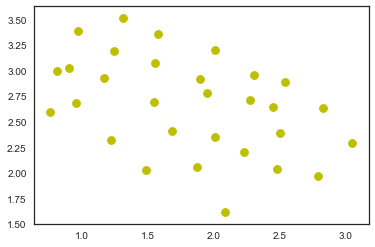

In [1020]:
plotData(X1,y1)

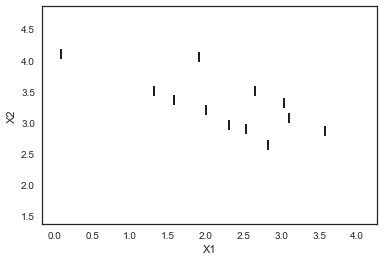

Number of support vectors:  12


In [1021]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

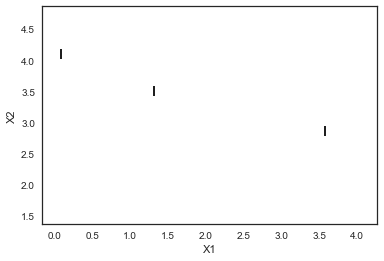

Number of support vectors:  3


In [1022]:
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

**SVM with Gaussian Kernels**

In [1023]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

In [1024]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

**Example Dataset 2**

In [1025]:
data = scipy.io.loadmat(location+'ex6data2.mat')

In [1026]:
y2 = data['y']
X2 = data['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


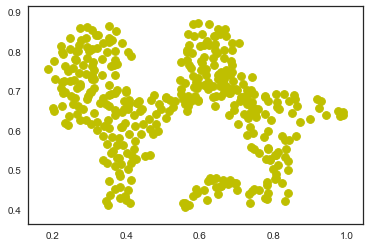

In [1027]:
plotData(X2, y2)

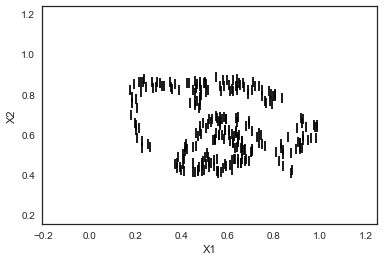

Number of support vectors:  254


In [1028]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

**Example Dataset 3**

In [1029]:
data = scipy.io.loadmat(location+'ex6data3.mat')

In [1030]:
y3 = data['y']
X3 = data['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


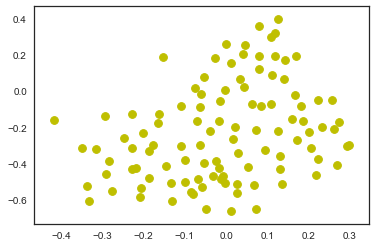

In [1031]:
plotData(X3, y3)

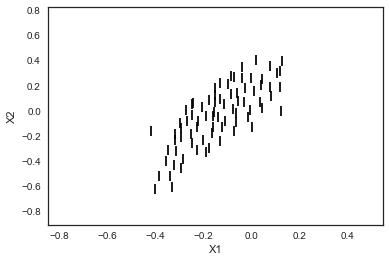

Number of support vectors:  78


In [1032]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

**Spam classification**

In [1033]:
data = pd.read_table(location+'vocab.txt', header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
0    1899 non-null int64
1    1899 non-null object
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


In [1034]:
data[:5]

   0      1
0  1     aa
1  2     ab
2  3   abil
3  4    abl
4  5  about

K-Means 
========

Find Closes Centroids

In [1035]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy.io import loadmat
%matplotlib inline


In [1036]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex7/'
data = scipy.io.loadmat(location+'ex7data2.mat')

X = data['X']
K = 3 # 3 Centroids

initial_centroids = np.matrix([[3,3],[6,2],[8,5]])

In [1037]:
initial_centroids

matrix([[3, 3],
        [6, 2],
        [8, 5]])

Find Closest Centroids

In [1038]:
def findClosestCentroids(X, centroids):
    X=np.matrix(X)
    centroids=np.matrix(centroids)
    # Set K
    K = centroids.shape[0]
    # You need to return the following variables correctly.
    # from http://stackoverflow.com/a/24261734/583834
    # to avoid error "arrays used as indices must be of integer (or boolean) type"
    idx = np.zeros((X.shape[0], 1), dtype=np.int8)
    # set m = # of training examples
    m,n = X.shape
    # for every training example
    for i in range(m):
        # for every centroid
        for j in range(K):
            # compute the euclidean distance between the example and the centroid
            difference = X[i,:]-centroids[j,:]
            distance = np.power(np.sqrt(difference.dot(difference.T)), 2)

            # if this is the first centroid, initialize the min_distance and min_centroid
            # OR 
            # if distance < min_distance, reassign min_distance=distance and min_centroid to current j
            if j == 0 or distance < min_distance:
              min_distance = distance
              min_centroid = j

        # assign centroid for this example to one corresponding to the min_distance 
        idx[i]= min_centroid
    return idx

In [1039]:
idx = findClosestCentroids(X, initial_centroids)
idx[:3]

array([[0],
       [2],
       [1]], dtype=int8)

Compute Means

In [1040]:
def computeCentroids(X,idx,K):
    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    # for each centroid
    for j in range(K):
    # find training example indices that are assigned to current centroid
        # notice the [0] indexing - it's necessary because of np.nonzero()'s 
        #   two-array output
        centroid_examples = np.nonzero(idx == j)[0]

        #compute mean over all such training examples and reassign centroid
        centroids[j,:] = np.mean( X[centroid_examples,:], axis=0 )
    return centroids

In [1041]:
centroids = computeCentroids(X, idx, K)
centroids

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

K-means Clustering

In [1042]:
data=scipy.io.loadmat(location+'ex7data2.mat')
X=data['X']
K=3
max_iters = 10

In [1043]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [1044]:
import sys
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    # if plotting, set up the space for interactive graphs
    if plot_progress:
        plt.close()
        plt.ion()

    # Run K-Means
    for i in range(max_iters):
        
        # Output progress
        sys.stdout.write('\rK-Means iteration {:d}/{:d}...'.format(i+1, max_iters))
        sys.stdout.flush()
        
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            #raw_input('Press enter to continue.')
        
        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [1045]:
centroids, idx = runkMeans(X, initial_centroids, max_iters)

K-Means iteration 10/10...

In [1046]:
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    # Initialize the centroids to be random examples
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    return centroids

In [1047]:
data = scipy.io.loadmat(location+'bird_small.mat')
A = data['A']

A = A / 255.0
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3, order='F').copy()

K = 16 
max_iters=10

initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

K-Means iteration 10/10...

In [1048]:
initial_centroids

array([[ 0.94117647,  0.90980392,  0.70588235],
       [ 0.99215686,  0.79607843,  0.50980392],
       [ 0.8       ,  0.68235294,  0.31764706],
       [ 0.81960784,  0.65490196,  0.37254902],
       [ 0.09803922,  0.11372549,  0.10588235],
       [ 0.99215686,  0.99215686,  0.80392157],
       [ 0.58823529,  0.51764706,  0.27058824],
       [ 0.89803922,  0.76470588,  0.48627451],
       [ 0.07843137,  0.09803922,  0.0745098 ],
       [ 0.12941176,  0.13333333,  0.14509804],
       [ 0.22352941,  0.15686275,  0.10196078],
       [ 1.        ,  0.93333333,  0.87843137],
       [ 0.06666667,  0.07058824,  0.0627451 ],
       [ 0.70196078,  0.51764706,  0.53333333],
       [ 0.38823529,  0.29411765,  0.3254902 ],
       [ 0.54901961,  0.46666667,  0.23529412]])

In [1049]:
centroids

array([[ 0.81855527,  0.73491519,  0.72671118],
       [ 0.96356016,  0.85627935,  0.62171395],
       [ 0.77486184,  0.53754554,  0.23533505],
       [ 0.82277659,  0.64420781,  0.37746959],
       [ 0.13287103,  0.14109358,  0.13224932],
       [ 0.97601467,  0.94189669,  0.811322  ],
       [ 0.59747547,  0.49487311,  0.4118748 ],
       [ 0.86070734,  0.72441813,  0.4843907 ],
       [ 0.09371407,  0.10127046,  0.09066603],
       [ 0.20518181,  0.19781533,  0.19329433],
       [ 0.34718125,  0.27980723,  0.23851999],
       [ 0.55478222,  0.70603203,  0.87096243],
       [ 0.06649436,  0.07225787,  0.06208853],
       [ 0.62122807,  0.5852064 ,  0.58555212],
       [ 0.40415011,  0.3822101 ,  0.41536943],
       [ 0.55548423,  0.40781433,  0.1975269 ]])

In [1050]:
idx[:3]

array([[3],
       [7],
       [7]], dtype=int8)

Image Compression

In [1051]:
from matplotlib import colors

def hsv(n=63):
    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1) , np.ones( ((n+1), 2) ) ]) )

In [1052]:
import matplotlib.pyplot as plt

def drawLine(p1, p2, **kwargs):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

In [1053]:
def plotDataPoints(X, idx, K):
    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])

    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)
    return

In [1054]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    # Plot the examples
    plotDataPoints(X, idx, K)

    # Plot the centroids as black x's
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=400, c='k', linewidth=1)

    # Plot the history of the centroids with lines
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], c='b')

    # Title
    plt.title('Iteration number {:d}'.format(i+1))

    return

In [1055]:
# Find closest cluster members
idx = findClosestCentroids(X, centroids)
idx[:3]
max_iters=10

In [1056]:
X_recovered = centroids[idx,:]

In [1057]:
# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3, order='F')

K-Means iteration 10/10...

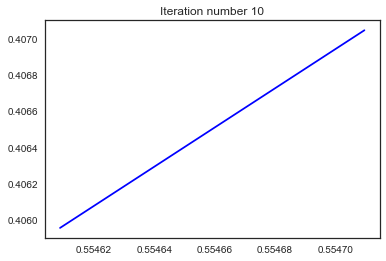

In [1058]:
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

Text(0.5,1,'Original')

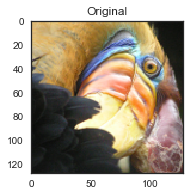

In [1059]:
# Display the original image
plt.close()
plt.subplot(1, 2, 1)
plt.imshow(A) 
plt.title('Original')

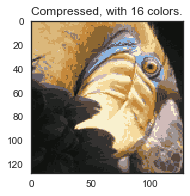

In [1060]:
# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title( 'Compressed, with {:d} colors.'.format(K) )
plt.show(block=False)

Implementing Principle Component Analysis

In [1061]:
data = scipy.io.loadmat(location+'ex7data1.mat')
X = np.array(data['X'])

In [1062]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

In [1063]:
X_norm, mu, _ = featureNormalize(X)

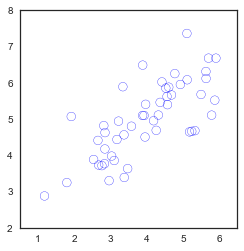

In [1064]:
# interactive graphs
plt.ion()

#  Visualize the example dataset
plt.close()

# kept the scatter() (vs. the plot()) version 
#  because scatter() makes properly circular markers
# plt.plot(X[:, 0], X[:, 1], 'o', markersize=9, markeredgewidth=1, markeredgecolor='b', markerfacecolor='None')
plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')
plt.show(block=False)


Principle Component Analysis
=================

In [1065]:
import numpy as np
import scipy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

In [1066]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, _ = featureNormalize(X)

In [1067]:
def pca(X):
    #PCA Run principal component analysis on the dataset X
    #   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
    #   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # compute the covariance matrix
    sigma = (1.0/m) * (X.T).dot(X)

    # compute the eigenvectors (U) and S
    # from: 
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.diagsvd.html#scipy.linalg.diagsvd
    U, S, Vh = linalg.svd(sigma)
    S = linalg.diagsvd(S, len(S), len(S))
    return U, S

In [1068]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)
    return Z

In [1069]:
def recoverData(Z, U, K):
    # get U_reduce for only the desired K
    U_reduce = U[:,:K]

    # recover data
    X_rec = Z.dot(U_reduce.T)
    return X_rec

In [1070]:
def computeCentroids(X, idx, K):
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))
    # for each centroid
    for j in range(K):

        centroid_examples = np.nonzero(idx == j)[0]
        centroids[j,:] = np.mean( X[centroid_examples,:], axis=0 )

    return centroids

In [1071]:
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1), dtype=np.int8)
    m = X.shape[0]
    for i in range(m):

        # for every centroid
        for j in range(K):

            # compute the euclidean distance between the example and the centroid
            difference = X[i,:]-centroids[j,:]
            distance = np.power(np.sqrt( difference.dot(difference.T) ), 2)
            if j == 0 or distance < min_distance:
              min_distance = distance
              min_centroid = j
        idx[i]= min_centroid

        return idx

In [1072]:
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]

    return centroids

In [1073]:
def displayData(X, example_width=None):
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))

    # Gray Image
    plt.set_cmap("gray")

    # Compute rows, cols
    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m // display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
        
            # Copy the patch
            
            # Get the max value of the patch to normalize all examples
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
    
        if curr_ex > m:
            break

    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)

    # Do not show axis
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

In [1074]:
def drawLine(p1, p2, **kwargs):

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

In [1075]:
def hsv(n=63):
    """
    adapted from Octave's (NOT matlab's) hsv(N) function
      which is equivalent to matlab's hsv2rgb([(0:N-1)'/N, ones(N,2)])
      from: http://octave.sourceforge.net/octave/function/hsv.html
            http://stackoverflow.com/q/23945764/583834
    """

    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb(np.column_stack([ np.linspace(0, 1, n+1) , np.ones( ((n+1), 2) ) ]) )

Visualizing example dataset for PCA.



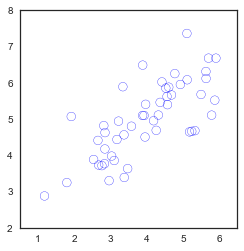

In [1076]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to
#  visualize
#
print('Visualizing example dataset for PCA.\n');

#  The following command loads the dataset. You should now have the 
#  variable X in your environment
data = scipy.io.loadmat(location+'ex7data1.mat')
X = np.array(data["X"])

# interactive graphs
plt.ion()

#  Visualize the example dataset
plt.close()

# kept the scatter() (vs. the plot()) version 
#  because scatter() makes properly circular markers
# plt.plot(X[:, 0], X[:, 1], 'o', markersize=9, markeredgewidth=1, markeredgecolor='b', markerfacecolor='None')
plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')
plt.show(block=False)

Running PCA on example dataset.

Top eigenvector: 

 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


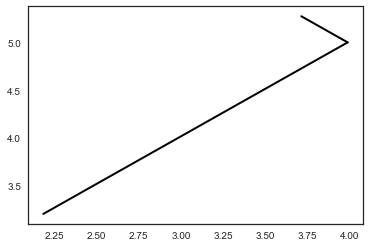

In [1077]:
## =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m
#
print('Running PCA on example dataset.\n');

#  Before running PCA, it is important to first normalize X
X_norm, mu, _ = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature
#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.hold(True)
drawLine(mu, mu + 1.5 * S[0,0] * U[:,0].T, c='k', linewidth=2)
drawLine(mu, mu + 1.5 * S[1,1] * U[:,1].T, c='k', linewidth=2)
plt.hold(False)

print('Top eigenvector: \n')
print(' U(:,1) = {:f} {:f} \n'.format(U[0,0], U[1,0]))
print('(you should expect to see -0.707107 -0.707107)')

Dimension reduction on example dataset.



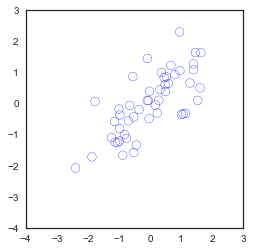

Projection of the first example:
 [ 1.48127391]
(this value should be about 1.481274)

Approximation of the first example: 
 -1.04741882592 -1.04741882592
(this value should be about  -1.047419 -1.047419)



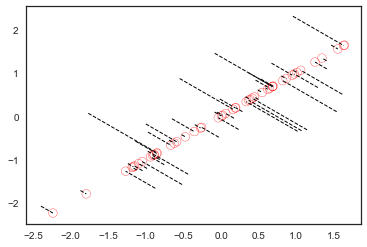

In [1078]:
## =================== Part 3: Dimension Reduction ===================
print('Dimension reduction on example dataset.\n');

#  Plot the normalized dataset (returned from pca)
plt.close()
plt.scatter(X_norm[:,0], X_norm[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([-4, 3, -4, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.show(block=False)

#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example:\n',Z[0])
print('(this value should be about 1.481274)\n')

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: \n',X_rec[0, 0], X_rec[0, 1])
print('(this value should be about  -1.047419 -1.047419)\n')

#  Draw lines connecting the projected points to the original points
plt.hold(True)
plt.scatter(X_rec[:, 0], X_rec[:, 1], s=75, facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:], linestyle='--', color='k', linewidth=1)
plt.hold(False)

Loading face dataset.



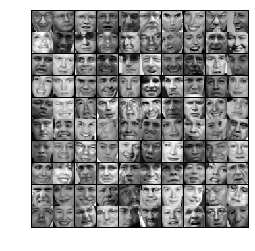

(<matplotlib.image.AxesImage at 0x12df0c81240>,
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -0.30570308, -0.20882444, ...,  0.02776458,
         -0.02539565, -1.        ],
        [-1.        , -0.37028884, -0.2734102 , ...,  0.00118446,
         -0.05197577, -1.        ],
        ..., 
        [-1.        ,  0.05386743, -0.41159068, ..., -0.69830925,
         -0.83105318, -1.        ],
        [-1.        ,  0.44028549, -0.18325274, ..., -0.66210637,
         -0.84312081, -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ]]))

In [1079]:
## =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment
#
print('Loading face dataset.\n');

#  Load Face dataset
data = scipy.io.loadmat(location+'ex7faces.mat')
X = np.array(data['X'])

#  Display the first 100 faces in the dataset
displayData(X[:100, :])

Running PCA on face dataset.
(this mght take a minute or two ...)



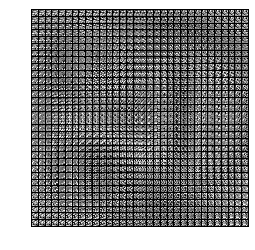

(<matplotlib.image.AxesImage at 0x12def900630>,
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -0.18669086, -0.3780324 , ..., -0.36925819,
          0.29760892, -1.        ],
        [-1.        , -0.47240258,  0.27417951, ..., -1.        ,
          0.64974624, -1.        ],
        ..., 
        [-1.        ,  0.1662879 , -0.79401759, ..., -0.26575361,
          0.14809442, -1.        ],
        [-1.        ,  0.57449539,  0.72561814, ...,  0.91562124,
         -0.57458756, -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ]]))

In [1080]:
## =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.
#
print('Running PCA on face dataset.\n(this mght take a minute or two ...)\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, _, _ = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, :36])

In [1081]:
## ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
print('Dimension reduction for face dataset.\n');

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print(Z.shape[0], Z.shape[1])


Dimension reduction for face dataset.

The projected data Z has a size of: 
5000 100


Visualizing the projected (reduced dimension) faces.



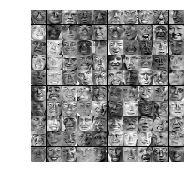

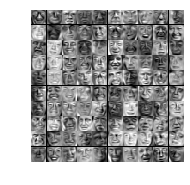

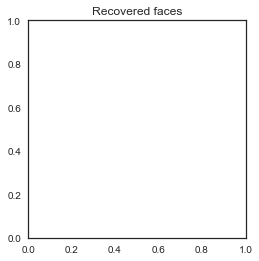

In [1082]:
## ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print('Visualizing the projected (reduced dimension) faces.\n')

K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
plt.close()
plt.subplot(1, 2, 1)
displayData(X_norm[:100,:])
plt.title('Original faces')
plt.gca().set_aspect('equal', adjustable='box')

# Display reconstructed data from only k eigenfaces
plt.subplot(1, 2, 2)
displayData(X_rec[:100,:])
plt.title('Recovered faces')
plt.gca().set_aspect('equal', adjustable='box')

K-Means iteration 10/10...

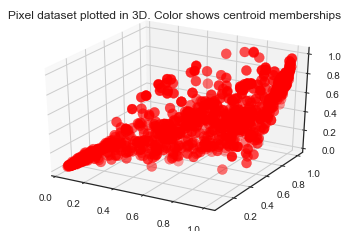

In [1083]:
## === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.

plt.close()

# Re-load the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first

# A = double(imread('bird_small.png'));
data = scipy.io.loadmat(location+'bird_small.mat')
A = data["A"]

# from ex7.py, part 4
A = A / 255.0
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3, order='F').copy()
K = 16 
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
#  use flatten(). otherwise, Z[sel, :] yields array w shape [1000,1,2]
sel = np.floor(np.random.rand(1000, 1) * X.shape[0]).astype(int).flatten()

#  Setup Color Palette
palette = hsv(K)
colors = np.array([palette[int(i)] for i in idx[sel]])

#  Visualize the data and centroid memberships in 3D
fig1 = plt.figure(1)
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], s=100, c=colors)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show(block=False)

In [1084]:
#  Principle Component Analysis and K-Means Clustering
## === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, _, _ = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

In [1085]:
Z[sel, :]

array([[-0.51608382, -0.21262441],
       [ 0.75115153, -0.51330964],
       [-0.56021752,  0.90155258],
       ..., 
       [ 1.99394121, -0.07611812],
       [-1.37714047,  0.318594  ],
       [ 2.40660011, -0.09327701]])

In [1086]:
idx[:5]

array([[10],
       [ 0],
       [ 0],
       [ 0],
       [ 0]], dtype=int8)

In [1087]:
K

16

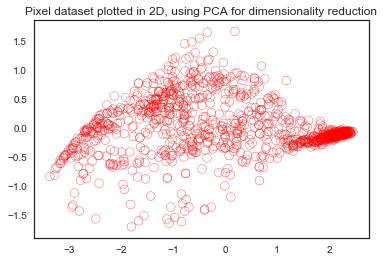

In [1088]:
from matplotlib import colors
# Plot in 2D
fig2 = plt.figure(2)
plotDataPoints(Z[sel, :], idx[sel], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show(block=False)

Anomoly Detection and Recommender Systems
==========================

In [1089]:
import numpy as np

def estimateGaussian(X):
    # Useful variables
    m, n = X.shape

    # You should return these values correctly
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))

    # estimating mu - at this point it is an n-column vector
    # mu = (1/m)*sum(X,1);
    mu = np.mean(X, axis=0)
    # turn into n-rows vector
    mu = mu.T

    # turn into n-rows vector
    sigma2 = sigma2.T
    return mu, sigma2

In [1090]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0

    stepsize = (max(pval) - min(pval)) / 1000
    for epsilon in np.arange(min(pval), max(pval), stepsize):
        cvPredictions = pval < epsilon
        tp = np.sum(np.logical_and((cvPredictions==1), (yval==1)).astype(float))

        # false positives are the ones we predicted to be true (cvPredictions==1) but weren't (yval==0)
        fp = np.sum(np.logical_and((cvPredictions==1), (yval==0)).astype(float))
        
        # false negatives are the ones we said were false (cvPredictions==0) but which were true (yval==1)
        fn = np.sum(np.logical_and((cvPredictions==0), (yval==1)).astype(float))

        # compute precision, recall and F1
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (2*precision*recall)/(precision+recall)
        if F1 > bestF1:
           bestF1 = F1
           bestEpsilon = epsilon

    return bestEpsilon, bestF1

In [1091]:

def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_var):
    X = np.reshape(params[:num_movies*num_features], (num_movies, num_features), order='F')
    Theta = np.reshape(params[num_movies*num_features:], (num_users, num_features), order='F')

    # You need to return the following values correctly
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    # X * Theta performed according to low rank matrix vectorization
    squared_error = np.power(np.dot(X,Theta.T) - Y,2)

    # for cost function, sum only i,j for which R(i,j)=1
    J = (1/2.) * np.sum(squared_error * R)
    X_grad = np.dot(( np.dot(X, Theta.T) - Y ) * R, Theta)
    Theta_grad = np.dot((( np.dot(X, Theta.T) - Y ) * R).T, X)
    J = J + (lambda_var/2.)*( np.sum( np.power(Theta, 2) ) + np.sum( np.power(X, 2) ) )
    X_grad = X_grad + lambda_var*X
    Theta_grad = Theta_grad + lambda_var*Theta
    grad = np.concatenate((X_grad.reshape(X_grad.size, order='F'), Theta_grad.reshape(Theta_grad.size, order='F')))

    return J, grad

In [1092]:
def checkCostFunction(lambda_var=0):
    #CHECKCOSTFUNCTION Creates a collaborative filering problem 
    #to check your cost function and gradients
    #   CHECKCOSTFUNCTION(lambda_var) Creates a collaborative filering problem 
    #   to check your cost function and gradients, it will output the 
    #   analytical gradients produced by your code and the numerical gradients 
    #   (computed using computeNumericalGradient). These two gradient 
    #   computations should result in very similar values.

    # Set lambda_var
    # if not lambda_var or not 'lambda_var' in locals():
    #     lambda_var = 0

    ## Create small problem
    X_t = np.random.rand(4, 3)
    Theta_t = np.random.rand(5, 3)

    # Zap out most entries
    Y = np.dot(X_t, Theta_t.T)
    Y[np.random.rand(Y.shape[0], Y.shape[1]) > 0.5] = 0
    R = np.zeros(Y.shape)
    R[Y != 0] = 1

    ## Run Gradient Checking
    X = np.random.randn(X_t.shape[0], X_t.shape[1])
    Theta = np.random.randn(Theta_t.shape[0], Theta_t.shape[1])
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta_t.shape[1]

    params = np.concatenate((X.reshape(X.size, order='F'), Theta.reshape(Theta.size, order='F')))

    # Short hand for cost function
    def costFunc(p):
        return cofiCostFunc(p, Y, R, num_users, num_movies, num_features, lambda_var)

    numgrad = computeNumericalGradient(costFunc, params)

    cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_var)


    print(np.column_stack((numgrad, grad)))
    print('The above two columns you get should be very similar.\n' \
             '(Left-Your Numerical Gradient, Right-Analytical Gradient)')

    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
    print('If your backpropagation implementation is correct, then \n' \
             'the relative difference will be small (less than 1e-9). ' \
             '\nRelative Difference: {:e}'.format(diff))

In [1093]:
def loadMovieList():
    #GETMOVIELIST reads the fixed movie list in movie.txt and returns a
    #cell array of the words
    #   movieList = GETMOVIELIST() reads the fixed movie list in movie.txt 
    #   and returns a cell array of the words in movieList.


    ## Read the fixed movieulary list
    with open(location+"movie_ids.txt") as movie_ids_file:

        # Store all movies in movie list
        n = 1682  # Total number of movies 

        movieList = [None]*n
        for i, line in enumerate(movie_ids_file.readlines()):
            movieName = line.split()[1:]
            movieList[i] = " ".join(movieName)

    return movieList

In [1094]:
def normalizeRatings(Y, R):
    #NORMALIZERATINGS Preprocess data by subtracting mean rating for every 
    #movie (every row)
    #   [Ynorm, Ymean] = NORMALIZERATINGS(Y, R) normalized Y so that each movie
    #   has a rating of 0 on average, and returns the mean rating in Ymean.
    #

    m, n = Y.shape
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros(Y.shape)
    for i in range(m):
        idx = R[i, :] == 1
        Ymean[i] = np.mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]

    return Ynorm, Ymean

In [1095]:
location='C://Users/pmlef/Desktop/Data Science/Theory/Machine Learning/Examples/ex8/'
data = scipy.io.loadmat(location+'ex8_movies.mat')

In [1096]:
Y = data['Y']
R = data['R']

Loading movie ratings dataset.

Average rating for movie 1 (Toy Story): 3.878319 / 5



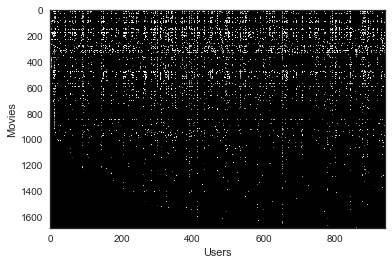

In [1097]:
## =============== Part 1: Loading movie ratings dataset ================
#  You will start by loading the movie ratings dataset to understand the
#  structure of the data.
#  
print('Loading movie ratings dataset.\n')

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1 (Toy Story): {:f} / 5\n'.format(np.mean(Y[0, R[0, :]==1])))

#  We can "visualize" the ratings matrix by plotting it with imagesc
# need aspect='auto' for a ~16:9 (vs almost vertical) aspect
plt.imshow(Y, aspect='auto') 
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show(block=False)

In [1098]:
## ============ Part 2: Collaborative Filtering Cost Function ===========
#  You will now implement the cost function for collaborative filtering.
#  To help you debug your cost function, we have included set of weights
#  that we trained on that. Specifically, you should complete the code in 
#  cofiCostFunc.m to return J.

#  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
data = scipy.io.loadmat(location+'ex8_movieParams.mat')
X = data['X']
Theta = data['Theta']
num_users = data['num_users']
num_movies = data['num_movies']
num_features = data['num_features']

#  Reduce the data set size so that this runs faster
num_users = 4 
num_movies = 5 
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

#  Evaluate cost function
params = np.concatenate((X.reshape(X.size, order='F'), Theta.reshape(Theta.size, order='F')))
J, _ = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, 0)
           
print('Cost at loaded parameters: {:f}\n(this value should be about 22.22)\n'.format(J))

Cost at loaded parameters: 22.224604
(this value should be about 22.22)



In [1099]:
## ============== Part 3: Collaborative Filtering Gradient ==============
#  Once your cost function matches up with ours, you should now implement 
#  the collaborative filtering gradient function. Specifically, you should 
#  complete the code in cofiCostFunc.m to return the grad argument.
#  
print('\nChecking Gradients (without regularization) ... \n')

#  Check gradients by running checkNNGradients
checkCostFunction()


Checking Gradients (without regularization) ... 

[[ 4.06663905  4.06663905]
 [ 5.89343242  5.89343242]
 [ 3.41307811  3.41307811]
 [-1.33547869 -1.33547869]
 [-0.59384881 -0.59384881]
 [-0.95187622 -0.95187622]
 [-0.18884515 -0.18884515]
 [ 0.80061482  0.80061482]
 [-3.25020041 -3.25020041]
 [-2.24987965 -2.24987965]
 [-2.16671067 -2.16671067]
 [ 0.83326431  0.83326431]
 [-3.72993739 -3.72993739]
 [-0.94033779 -0.94033779]
 [-0.33020604 -0.33020604]
 [ 0.11587327  0.11587327]
 [ 0.60457444  0.60457444]
 [-2.47226553 -2.47226553]
 [-0.64983942 -0.64983942]
 [-0.33690137 -0.33690137]
 [ 0.03959634  0.03959634]
 [ 0.27410373  0.27410373]
 [ 0.98209742  0.98209742]
 [ 0.04091048  0.04091048]
 [ 0.84382404  0.84382404]
 [ 0.32406073  0.32406073]
 [ 0.49566937  0.49566937]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)
If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1

In [1100]:
# ========= Part 4: Collaborative Filtering Cost Regularization ========
#  Now, you should implement regularization for the cost function for 
#  collaborative filtering. You can implement it by adding the cost of
#  regularization to the original cost computation.
#  
#  Evaluate cost function
params = np.concatenate((X.reshape(X.size, order='F'), Theta.reshape(Theta.size, order='F')))
J, _ = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, 1.5)
           
print('Cost at loaded parameters (lambda_var = 1.5): {:f} '\
         '\n(this value should be about 31.34)\n'.format(J))

Cost at loaded parameters (lambda_var = 1.5): 31.344056 
(this value should be about 31.34)



In [1101]:
## ======= Part 5: Collaborative Filtering Gradient Regularization ======
#  Once your cost matches up with ours, you should proceed to implement 
#  regularization for the gradient. 
#

#  
print('\nChecking Gradients (with regularization) ... \n')

#  Check gradients by running checkNNGradients
checkCostFunction(1.5)


Checking Gradients (with regularization) ... 

[[ 2.73495112  2.73495112]
 [ 6.97648493  6.97648493]
 [ 2.3968141   2.3968141 ]
 [-2.2374072  -2.2374072 ]
 [-0.70807066 -0.70807066]
 [-0.65992247 -0.65992247]
 [-3.00033727 -3.00033727]
 [ 2.6074468   2.6074468 ]
 [-3.23379954 -3.23379954]
 [-4.60571693 -4.60571693]
 [ 2.57590016  2.57590016]
 [ 6.54960057  6.54960057]
 [-5.30815657 -5.30815657]
 [-2.27547987 -2.27547987]
 [-0.92264477 -0.92264477]
 [ 1.62252512  1.62252512]
 [-1.64596626 -1.64596626]
 [ 0.34147538  0.34147538]
 [ 2.3557573   2.3557573 ]
 [ 0.73811854  0.73811854]
 [-0.50453525 -0.50453525]
 [ 2.24592217  2.24592217]
 [ 3.11345649  3.11345649]
 [ 1.88909825  1.88909825]
 [ 2.70036036  2.70036036]
 [ 1.38277519  1.38277519]
 [ 6.89432436  6.89432436]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)
If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9

In [1102]:
## ============== Part 6: Entering ratings for a new user ===============
#  Before we will train the collaborative filtering model, we will first
#  add ratings that correspond to a new user that we just observed. This
#  part of the code will also allow you to put in your own ratings for the
#  movies in our dataset!
#
movieList = loadMovieList()

#  Initialize my ratings
my_ratings = np.zeros((1682, 1))

# NOTE THAT THE FOLLOWING SECTION AS WELL AS THE movie_ids.txt file
# USED HERE IS ADAPTED FOR PYTHON'S 0-INDEX (VS MATLAB/OCTAVE'S 1-INDEX)

# Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 0, so to rate it "4", you can set
# my_ratings[0] = 4

# Or suppose did not enjoy Silence of the Lambs (1991), you can set
# my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[0] = 5
# my_ratings[6] = 3
my_ratings[11]= 5
# my_ratings[53] = 4
my_ratings[63]= 4
# my_ratings[65]= 3
my_ratings[68] = 3
my_ratings[97] = 4
# my_ratings[182] = 4
my_ratings[225] = 3
# my_ratings[354]= 5

print('\n\nNew user ratings:\n')
for i, rating in enumerate(my_ratings):
    if rating > 0: 
        print('Rated {:.0f} for {:s}\n'.format(rating[0], movieList[i]))




New user ratings:

Rated 5 for Toy Story (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Shawshank Redemption, The (1994)

Rated 3 for Forrest Gump (1994)

Rated 4 for Silence of the Lambs, The (1991)

Rated 3 for Die Hard 2 (1990)



In [1103]:
## ================== Part 7: Learning Movie Ratings ====================
#  Now, you will train the collaborative filtering model on a movie rating 
#  dataset of 1682 movies and 943 users
#

print('\nTraining collaborative filtering...\n')

#  Load data
mat = scipy.io.loadmat(location+'ex8_movies.mat')
Y = mat["Y"]
R = mat["R"]

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  Add our own ratings to the data matrix
Y = np.column_stack((my_ratings, Y))
R = np.column_stack(((my_ratings != 0).astype(int), R))

#  Normalize Ratings
[Ynorm, Ymean] = normalizeRatings(Y, R)

#  Useful Values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.concatenate((X.reshape(X.size, order='F'), Theta.reshape(Theta.size, order='F')))

# Set options
maxiter = 100
options = {'disp': True, 'maxiter':maxiter}
lambda_var=10

# Create "short hand" for the cost function to be minimized
def costFunc(initial_parameters):
    return cofiCostFunc(initial_parameters, Y, R, num_users, num_movies, num_features, lambda_var)

# Set Regularization
results = minimize(costFunc, x0=initial_parameters, options=options, method="L-BFGS-B", jac=True)
theta = results["x"]

# Unfold the returned theta back into U and W
X = np.reshape(theta[:num_movies*num_features], (num_movies, num_features), order='F')
Theta = np.reshape(theta[num_movies*num_features:], (num_users, num_features), order='F')

print('Recommender system learning completed.\n')



Training collaborative filtering...

Recommender system learning completed.



In [1104]:
## ================== Part 8: Recommendation for you ====================
#  After training the model, you can now make recommendations by computing
#  the predictions matrix.
#

p = np.dot(X, Theta.T)
my_predictions = p[:,0] + Ymean.flatten()

movieList = loadMovieList()

# from http://stackoverflow.com/a/16486305/583834
# reverse sorting by index
ix = my_predictions.argsort()[::-1]

print('\n\nTop recommendations for you:\n')
for i in range(10):
    j = ix[i]
    print('Predicting rating for movie',movieList[j],'  prediction: ',my_predictions[j])

print('\n\nOriginal ratings provided:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Movie for', movieList[i],'Rating: ',my_ratings[i])



Top recommendations for you:

Predicting rating for movie Star Wars (1977)   prediction:  7.93997842163
Predicting rating for movie Schindler's List (1993)   prediction:  7.7789470617
Predicting rating for movie Titanic (1997)   prediction:  7.76335683742
Predicting rating for movie Shawshank Redemption, The (1994)   prediction:  7.75938331854
Predicting rating for movie Good Will Hunting (1997)   prediction:  7.64144250044
Predicting rating for movie Usual Suspects, The (1995)   prediction:  7.61785924672
Predicting rating for movie Godfather, The (1972)   prediction:  7.57819258826
Predicting rating for movie Raiders of the Lost Ark (1981)   prediction:  7.55522050372
Predicting rating for movie Close Shave, A (1995)   prediction:  7.50165413845
Predicting rating for movie Empire Strikes Back, The (1980)   prediction:  7.49887954453


Original ratings provided:

Movie for Toy Story (1995) Rating:  [ 5.]
Movie for Usual Suspects, The (1995) Rating:  [ 5.]
Movie for Shawshank Redempt

Random Forest
===========

In [1105]:
Math(r'\text{1. For } b=1 \text{ to } *B*')

<IPython.core.display.Math object>

(a) Draw a bootsrap sample **Z*** of size *N* from the training data.

(b) Grow a random-forest tree Tb to the bootstrapped data, by recursively repeating the following steps for each terminal node of the tree, until the minimum node size Nmin is reached

            i. Select m variables at random from p variables.
            ii. Pick the best variable/split-point among the m.
            iii. Split the node into two daughter nodes.

In [1106]:
Math(r'\text{2. Output the ensemble of trees } (T_b)^B_1  \text{ To make a prediciton at a new point x:}')

<IPython.core.display.Math object>

In [1107]:
Math(r'Regression: \hat{f}^B_{rf}(x)=\frac{1}{B}\sum_{b=1}^BT_b(x)')

<IPython.core.display.Math object>

In [1108]:
Math(r'Classification: Let \hat{C}_b(x) \text{ be the class prediction of the *b*th random-forest tree. Then } \hat{C}^B_{rf}(x)=\text{ majority vote }(\hat{C}_b(x))^B_1')

<IPython.core.display.Math object>

**Entropy Equation**

In [1109]:
Math(r'Entropy(D)\equiv\ \sum_{i=1}^c- p_i log_2(p_i)')

<IPython.core.display.Math object>

**Information Gain**

In [1110]:
Math(r'Gain(D,A)=Entropy(D)-\sum_{j=1}\frac{D_j}{D}Entropy(D_j)')

<IPython.core.display.Math object>

**Where:**
    - D: A given data partition
    - A: Attribute
    - v: Suppose we were to partition the tuples in D on some attribute A haveing v distinct values
    - D is split into v partition or subsets, {D1,D2,...Dj}, where Dj contains those tuples in D that have the outcome aj of A.

Example Source: https://www.youtube.com/watch?v=LDRbO9a6XPU

Decision Tree/Identification Tree from scratch

In [1111]:
# For Python 2 / 3 compatability
from __future__ import print_function

In [1112]:
# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
# Feel free to play with it by adding more features & examples.
# Interesting note: I've written this so the 2nd and 5th examples
# have the same features, but different labels - so we can see how the
# tree handles this case.
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [1113]:
# Column labels.
# These are used only to print the tree.
header = ["color", "diameter", "label"]

In [1114]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [1115]:
#######
# Demo:
unique_vals(training_data, 0)
# unique_vals(training_data, 1)
#######

{'Green', 'Red', 'Yellow'}

In [1116]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [1117]:
#######
# Demo:
class_counts(training_data)
#######

{'Apple': 2, 'Grape': 2, 'Lemon': 1}

In [1118]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [1119]:
#######
# Demo:
is_numeric(7)
# is_numeric("Red")
#######

True

In [1120]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [1121]:
#######
# Demo:
# Let's write a question for a numeric attribute
Question(1, 3)

Is diameter >= 3?

In [1122]:
# How about one for a categorical attribute
q = Question(0, 'Green')
q

Is color == Green?

In [1123]:
# Let's pick an example from the training set...
example = training_data[0]
# ... and see if it matches the question
q.match(example) # this will be true, since the first example is Green.
#######

True

In [1124]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [1125]:
#######
# Demo:
# Let's partition the training data based on whether rows are Red.
true_rows, false_rows = partition(training_data, Question(0, 'Red'))
# This will contain all the 'Red' rows.
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

In [1126]:
# This will contain everything else.
false_rows
#######

[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]

In [1127]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [1128]:
#######
# Demo:
# Let's look at some example to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
              ['Apple']]
# this will return 0
gini(no_mixing)

0.0

In [1129]:
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
some_mixing = [['Apple'],
               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
gini(some_mixing)

0.5

In [1130]:
# Now, we'll look at a dataset with many different labels
lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
gini(lots_of_mixing)
#######

0.7999999999999998

In [1131]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [1132]:
#######
# Demo:
# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
current_uncertainty

0.6399999999999999

In [1133]:
# How much information do we gain by partioning on 'Green'?
true_rows, false_rows = partition(training_data, Question(0, 'Green'))
info_gain(true_rows, false_rows, current_uncertainty)

0.1399999999999999

In [1134]:
# What about if we partioned on 'Red' instead?
true_rows, false_rows = partition(training_data, Question(0,'Red'))
info_gain(true_rows, false_rows, current_uncertainty)

0.37333333333333324

In [1135]:
# It looks like we learned more using 'Red' (0.37), than 'Green' (0.14).
# Why? Look at the different splits that result, and see which one
# looks more 'unmixed' to you.
true_rows, false_rows = partition(training_data, Question(0,'Red'))

# Here, the true_rows contain only 'Grapes'.
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

In [1136]:
# And the false rows contain two types of fruit. Not too bad.
false_rows

[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]

In [1137]:
# On the other hand, partitioning by Green doesn't help so much.
true_rows, false_rows = partition(training_data, Question(0,'Green'))

# We've isolated one apple in the true rows.
true_rows

[['Green', 3, 'Apple']]

In [1138]:
# But, the false-rows are badly mixed up.
false_rows
#######

[['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

In [1139]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [1140]:
#######
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
best_question
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

Is diameter >= 3?

In [1141]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [1142]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [1143]:
def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [1144]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [1145]:
my_tree = build_tree(training_data)

In [1146]:
print_tree(my_tree)

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Apple': 1, 'Lemon': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}


In [1147]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [1148]:
#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
classify(training_data[0], my_tree)
#######

{'Apple': 1}

In [1149]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [1150]:
#######
# Demo:
# Printing that a bit nicer
print_leaf(classify(training_data[0], my_tree))
#######

{'Apple': '100%'}

In [1151]:
#######
# Demo:
# On the second example, the confidence is lower
print_leaf(classify(training_data[1], my_tree))
#######

{'Apple': '50%', 'Lemon': '50%'}

In [1152]:
# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [1153]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}
